# Advanced Python

|Trainer|Mark Badham|
--|----
|Python Software|www.gitlab.com|
|Start| 09:00|
|Tea| 10:30-45|
|Lunch| 12:00-45|
|Tea| 14:30-45|

# Python Syntax 

- Case Sensitive
- One statement per line
Statement can be an expression

Comment

In [ ]:
# this is a comment

No multi line comment use Docstring

In [ ]:
    ''' ... '''

### Extending a line 

-   Backslash \\
-   Open ( [ {
-   Or triple quoted string '''

## Using Variables 

Naming rules

In [ ]:
   ^[A-Za-z_][A-Za-z0-9_]*$

Style Guide

-   Variables lowercase
-   multi\_word\_vars
-   CONSTANTS
-   ClassNames

### Builtin Types 

Numeric

-   int, long (py2), float, complex

Sequences

-   str, list, tuple

Other Iterables

-   set, frozenset, dictionary, file

Structures

-   Functions, Classes, Modules

## Python 2 amd 3 Compatibility

- Python 3 is a complete rewrite
- Not backwards compatible with Python 2

### Main Differences
- print
  + Py2 `print` is a statemet
  + Py3 `print()` is a function
  + Py2 a trailing comma suppresses new lines
  + Py3 `end` parameter which defaults to `'\n'`
- Division 
  + Py3 / float and // int
  + Py2 uses arithmetic promotion
- Strings
  + Py3 strings are Unicode by default, use  `b' ... '`  to create a Py2 compatible `bytes` object
  + Py2 srings are *ASCII* by default, use `u' ... '` ro create a Py3 compatible unicode string
  + `s.encode()` and `s.decode()` to concert str and bytes objects.
- Lists vs Generators
   + Most functions/methods that create actual lists in Py2, create generators in Py3
   + Use list(range(10)) for example to emulate Py2 behaviour

### Python 2to3
- there is a script called 2to3
- 2to3 converts Py2 code to Py3
- Makes the adjustments listed above
- Does not fix renamed modules in std lib

### Writing future proof Py2 Code

To offer backward compatibility with Python 2 from your Python 3 code, you can use the pasteurize script. This adds these lines at the top of each module:

In [ ]:
from __future__ import absolute_import

Absolute is a Py3 behaviour import which favours the `stdlib` functions over mosules in the path, unless you use `import . modulename`.

In [ ]:
from __future__ import division

Make Python2 use `/` for *float* division and `//` for *int* division.

In [ ]:
from __future__ import print_function

Creates a function called `print()` in Python2.

In [ ]:
from __future__ import unicode_literals

Python 3 string literals, that is `'text'` is now unicode and `b'text'` is ASCII.

See: (Python compatible idioms)[http://www.python-future.org/compatible_idioms.html]

### Pythonic code

In [ ]:
x,y = y,y+x

Replaces

In [ ]:
old_x = x
x = y
y = y + old_x
x,y = y,y+x

In [ ]:
dict(zip([(key1,val1),(key2,val2), ...]))

In [ ]:
if key in my_dict:
    return my_dict[key]
else: 
    my_dict[key] = DEFAULT 

Becomes:

In [ ]:
my_dict.setdefault(key, DEFAULT)

---

# Functions 

Definition

In [ ]:
def function_name():
    statements

Calling Function

In [ ]:
function_name()

### Objects
Functions in Python are first class objects. 
Using a function name without parenthesis is a reference to the function, 
when a function name is followed by parenthesis (with or without arguments) it is a function call.  

For example:

In [49]:
def square(x):
    return x**2

In [50]:
fn = square
print fn, square

<function square at 0x7f906032e8c0> <function square at 0x7f906032e8c0>


In [51]:
print fn(2), square(3)

4 9


## Parameters

In [ ]:
def fn(arg1, arg2):
    statements

In [ ]:
fn(1,2)

-   calls function fn with arg1=1 and arg2=2

In [ ]:
fn(arg2=1,arg1=2)

-   calls function fn with arg2=1 and arg1=2

### Parameter Passing Semantics

Parameters are passed by **value**.  
All python variables are **object refences**.
Hence Mutability is important when passing variables.

### Mutability
Immutable: int, log, float, complex,  str, tuple

In [18]:
s1 = 'test'
s2 = s1
s1 is s2

True

In [19]:
s1 += 'ing'
print s1,s2

testing test


Mutable: set, list, dict, custom class

In [24]:
l1 = [1,2,3]
l2 = l1
l1 is l2

True

In [25]:
l1 += [4]
l2

[1, 2, 3, 4]

### Hence ...

In [20]:
def doubler(x):
    x += x
    print x

a = 'a'
doubler(a)

aa


In [21]:
a

'a'

In [22]:
b = ['a']
doubler(b)

['a', 'a']


In [23]:
b

['a', 'a']

### Scope
In Python a block does not create a variable scope, only functions.
Global variables may be referenced, but not assigned (unless *global* keyword used)

In [17]:
VER = 1.0
def print_ver():
    print VER
print_ver()
 
def alter_ver():
    VER +=1
alter_ver()

1.0


UnboundLocalError: local variable 'VER' referenced before assignment

Hence `print_ver` works, but `alter_ver` has the above error:

### Optional Arguments

In [ ]:
def fn(arg1, arg2=0):

-   statements
-   Default values make an argument optional
-   All mandatory arguments are defined before any optional arguments.

### Variable argument lists

In [1]:
def fn(*args):
    print(args)

fn(1,2,3)

(1, 2, 3)


-   **args** becomes a tuple

### Key word args

In [2]:
def fn(**kwargs):
    print(kwargs)

fn(a='A',b='B')

{'a': 'A', 'b': 'B'}


-   **kwargs** becomes a dictionary

### Type Hinting (Py3.5+)

With the rise of intelligent IDEs type hinting has become  more compelling, as types can be checked and resolved in real time.

- Type hinting for:
  + Parameters and
  + Return type

In [ ]:
def greeting(name: str) -> str:
    return 'Hello ' + name

-  New module : `typing`

In [ ]:
from typing import Dict, Tuple, List

### Type aliases

A type alias is defined by assigning the type to the alias. In this example, Vector and List[float] will be treated as interchangeable synonyms:

In [ ]:
from typing import List
Vector = List[float]

def scale(scalar: float, vector: Vector) -> Vector:
    return [scalar * num for num in vector]

# typechecks; a list of floats qualifies as a Vector.
new_vector = scale(2.0, [1.0, -4.2, 5.4])

## lambda 

Inline anonymous function

In [ ]:
lambda arg1[,...] : expression

-   `arg1[,...]` function argument list
-   expression is returned by the function

### Simple lambda functions 

Square

In [ ]:
   lambda x: x**2

Even

In [ ]:
   lambda x: x%2==0

### Map

In [5]:
map( lambda x : x**2, range(5))

[0, 1, 4, 9, 16]

### Filter

In [119]:
filter( lambda x : x%2==0, range(5))

[0, 2, 4]

### List Comprehension

In [4]:
[ x**2 for x in range(5)]

[0, 1, 4, 9, 16]

-   Actual list created

The list comprehension behaves like `map()`, except that instead of requiring a function, the expression before *for* is applied to every element in the *iterable*. 

### Generator expression

In [16]:
for i in (x**2 for x in range(5)):
    print i,

0 1 4 9 16


- Not an actual list
- Iterable object i.e. has next()

A generator expression creates an iterable object instead of a list. The difference between a generator expressions and a list comprehension is analogous to that between `range()` and `xrange()`.  If the number of elements being processed is large a generator expression will be much more memory efficient than a list comprehension.

### Generator Functions 

- yield

-   Keyword always present in generator function
-   Function returns a generator object

In [ ]:
   o.next()

-   Executes up until **yield**
-   "break point" where execution temporarily stops and returns a value

Generator functions create iterable objects.  These objects have a method called *`next()`*, or *`__next__()`* in Python 3.  The each time this method is called the object will run through the function's code up until a `yield`  at which point that expression is returned.  When iterated over the generator object will have its `next()` method called successively, until it reaches the end at which point a *StopIteration* exception is raised.

### Updown

Example generator function `updown()` retrurns a generator object, that iterates up to (but not including) n, and the down again to 1.

In [3]:
def updown(n):
    for i in range(n): yield i
    for i in range(n,0,-1): yield i

In [4]:
for x in updown(5) : print x,

0 1 2 3 4 5 4 3 2 1


# Iteration Patterns in Python

In [6]:
d = {'A':'a', 'B':'b', 'C':'c'}
print 'keys',
for k in d:
    print k,
print '\nvalues',
for v in d.itervalues():
    print v,

keys A C B 
values a c b


In [7]:
print 'key => value'  
for k, v in d.iteritems():
    print k, ' => ', v

key => value
A  =>  a
C  =>  c
B  =>  b


### Iterating over Files

The traditional way to iterate over a file (`for line in file:`), has the disadvantage of not safely limiting the possible size pf the data read from the file at a time.  If we do not trust that the file has reasonably sized lines, we could do the following, and read 32 byte blocks.

In [ ]:
from functools import partial
with open('...') as f:
    blocks = []
    for block in iter(partial(f.read,32),''):
        blocks.append(block)

`Iter` takes a sentinal, as its second argument.  Appending a list is more efficient than concatenating strings!  

### Stdlib has interesting iterables

In [ ]:
for match in re.finditer(pattern, string):
    # once for each regex match...

In [ ]:
for root, dirs, files in os.walk('/some/dir'):
    # once for each sub-directory

## Itertools

The `itertools` module has a number of functions, useful fro iteration.

In [ ]:
# itertools is a module full of tools for playing with iteration
for num in itertools.count():
    # once for each integer... Infinite!

In [ ]:
from itertools import chain, repeat, cycle
seq = chain(repeat(17, 3), cycle(range(4)))   # cycles forever 
for num in seq:
    #17, 17, 17, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, ...

### Other functions useful with iterables

In [ ]:
new_list = list(iterable)

In [ ]:
results = [f(x) for x in iterable]

In [ ]:
total = sum(iterable)

In [ ]:
smallest = min(iterable)
largest = max(iterable)

In [ ]:
combined = "".join(iterable)

### Getting the index of a list in a loop

In [9]:
my_list = "abc def ghi jkl".split()

In [10]:
#Don't do this
for i in range(len(my_list)):
    v = my_list[i]
    print i, v

0 abc
1 def
2 ghi
3 jkl


In [11]:
#Do it this way instead
for i, v in enumerate(my_list):
    print i, v

0 abc
1 def
2 ghi
3 jkl


### enumerate() makes useful pairs

In [12]:
names = ["Eiffel Tower", "Empire State", "Sears Tower"]
list(enumerate(names))

for num, name in enumerate(names):
    print num, name

0 Eiffel Tower
1 Empire State
2 Sears Tower


### Iteration vs indexing
* Limited:

In [13]:
for i in range(len(my_list)):
    v = my_list[i]  # indexing
    print i, v

0 abc
1 def
2 ghi
3 jkl


**More powerful:**
* some iterables can't be indexed, such as an open file

In [ ]:
for i, v enumerate(iterable):
    print i, v

In [ ]:
for linenum, line in enumerate(f, sart=1):
    #...

### Looping over two lists

In [14]:
names = ["Eiffel Tower", "Empire State", "Sears Tower"]
heights = [324, 381, 442]

In [14]:
#Non - Pythonic way
for i in range(len(names)):
    name = names[i]
    height = heights[i]
    print "%s: %s meters" % (name, height)

Eiffel Tower: 324 meters
Empire State: 381 meters
Sears Tower: 442 meters


**A: zip() makes pair-wise loops**
* A pair of streams becomes a stream of pairs
* zip() takes iterables and produces iterables

In [15]:
for name, height in zip(names, heights):
    print "%s: %s meters" % (name, height)

Eiffel Tower: 324 meters
Empire State: 381 meters
Sears Tower: 442 meters


**dict() accepts a stream of pairs**

In [16]:
dict(zip(names, heights))

{'Eiffel Tower': 324, 'Empire State': 381, 'Sears Tower': 442}

**Powerful**

In [17]:
tall_buildings = {
   "Empire State": 381, "Sears Tower": 442,
   "Burj Khalifa": 828, "Taipei 101": 509,
}

In [18]:
print max(tall_buildings.values())

828


In [19]:
print max(tall_buildings.items(), key=lambda b: b[1])

('Burj Khalifa', 828)


In [20]:
print max(tall_buildings, key=tall_buildings.get)

Burj Khalifa


### Abstracting iteration
* When doing 2 things in the loop such as picking items out of the list and then doing something with those values.
* The picking and the doing can be two separate pieces that can be abstracted apart.

In [ ]:
nums = [88, 73, 92, 72, 40, 30, 25, 20, 98, 72]
for n in nums:
    if n % 2 == 0:
        do_something(n)

## Iterable Pattern
- Function evens accepts an iterable and produces a new iterable

In [ ]:
def evens(stream):
    them = []
    for n in stream:
        if n % 2 == 0:
            them.append(n)
    return them

for n in evens(nums):
    do_something(n)

**Functions return one value - Generators produce a stream**

* A Generator is like a function.
* A function when you call it, it runs all the statements and returns one value.
* A Generator when you call it produces an iterator and when you iterate the values in the iterator, it runs the statements in a generator, and every time it encounters a yield statement, it produces one more value.
* It's kind of like a function that can keep producing values over and over again.
* Generators are a really really powerful way to implement iteration.
* You should be writing more Generators.

**Evens generator**
- Let's turn our `evens` function into a generator

In [24]:
def evens(stream):
    for n in stream:
        if n % 2 == 0:
            yield n

**Chaining iterables**

In [24]:
def do_something(n):
    print n,

In [24]:
for n in evens(nums):
    do_something(n)

In [24]:
def evens(stream):
    for n in stream:
        if n % 2 == 0:
            yield n

In [24]:
for n in evens(nums):
    do_something(n)

88 92 72 40 30 20 98 72 88 92 72 40 30 20 98 72


## Abstracting the iteration

In [ ]:
with open("my_config.ini") as f:
    for line in f:
        line = line.strip()
        if line.startswith('#'):
            # A comment line, skip it
            continue
        if not line:
            # A blank line, skip it
            continue
            
        # An interesting line.
        do_something(line)

Note:
There are essentially two parts to this code.  The first part prodices the interesting lines in the file.  The second part applies some logic to the lines.

**Your own generator**

In [ ]:
def interesting_lines(f):
    for line in f:
        line = line.strip()
        if line.startswith('#'):
            continue
        if not line:
            continue
        yield line

In [ ]:
with open("my_config.ini") as f:
    for line in interesting_lines(f):
        do_something(line)
    
with open("my_other.dat") as f2:
    for line in interesting_lines(f2):
        do_something_else(line)

### Breaking out of a nested loop
- How is it done?

In [ ]:
for row in range(height):
    for col in range(width):
        
        value = spreadsheet.get_value(col, row)
        do_something(value)
        
        if this_is_my_value(value):
            break  #  <-  ???

**Make the double loop single**
* Through the use of a generator

In [ ]:
def range_2d(width, height):
    """Produce a stream of two-D coordinates."""
    for y in range(height):
        for x in range(width):
            yield x,y

In [ ]:
for col, row in range_2d(width, height):
    value = spreadsheet.get_value(col, row)
    do_something(value)
    
    if this_is_my_value(value):
        break

**Better: iterate cells**

In [ ]:
for cell in spreadsheet.cells():
    value = cell.get_value()
    do_something(value)
    
    if this_is_my_value(value):
        break

## Low Level Iteration
**Lower level**
* Iterable: produces and iterator
* Iterator: produces a stream of values
* Only operation on iterators is next()

In [ ]:
iterator = iter(iterable)  # iterable.__iter__()
value = next(iterator)     # iterator.next() or .__next
value = next(iterator)
...


**Low-level iteration**

In [ ]:
with open("blah.dat") as f:
    # Read the first line
    header_line = next(f)
    
    # Read the rest
    for data_line in f:
        # ...

**Making your object iterable**

In [ ]:
class ToDoList(object):
    def __init__(self):
        self.tasks = []
        
    def __iter__(self):
        return iter(self.tasks)    # returns an iterator over the list

In [ ]:
todo = ToDoList()
...
for task in todo:
    # ...

**`__iter__` generators**

In [ ]:
class ToDoList(object):
    def __init__(self):
        self.tasks = []
        
    def __iter__(self):
        for task in self.tasks:
            if not task.done:
                yeild task
                
    def all(self):
        return iter(self.tasks)
    
    def done(self):
        return (t for t in self.tasks if t.done)  # This is a generator expression

---
# Database Programming

## SQLite
The SQLite library allows SQL commands to access data in flat files.

In [25]:
import sqlite3

## Common DB API
- **`connect`**(*`filename`*) connect to a database stored in *filename* and return a *Connection* object 

- **`Connection.cursor`**() return a *cursor* object for the *connection*.

- **`Connection.commit`**() Commit Transaction (if `autocommit` is off).

- **`Connection.close`**() Close connection. Connection supports the *with* statement.

- **cursor.execute**(*sql*) execute a query in an *sql* string.

- **cursor.executemany**(*sql*,[()..]) execute parameterised query against a list of parameters.

- **cursor.fetch\[all\]**() return query result.

- **cursor.description** query meta data i.e. field names and properties.

## SQL examples

In [28]:
import sqlite3 as db
conn = db.connect('test1.db')
cur = conn.cursor()
sql = '...' # sql query as str
#cur.execute(sql)

## Create a table

In [29]:
sql = '''
   create table users(
   id int primary key,
   username varchar(64),
   password varchar(64))
   '''
cur.execute(sql)

## Insert a row
### Parameterised Query

In [36]:
sql = '''
    insert into users 
    values(?, ?,?)'''
cur.executemany(sql,[
    (2, 'fred', 'qwerty'),
    (3, 'sarah', 'asdf')])
conn.commit() #if auto commit not on

## Selecting

In [37]:
sql = "select * from users"
cur.execute(sql)

** Fetching Rows **
- cur.fetchall() -> list of tuples
- cur.fetchone() ) -> tuple
- for row in cur: 
   Iterate over result set 

In [38]:
cur.fetchall()

[(1, u'fred', u'qwerty'), (2, u'fred', u'qwerty'), (3, u'sarah', u'asdf')]

## Description
- The description allows us to fetch query meta data
- SQLITE only supports the column name meta data, hence other fields are always `None`.

In [39]:
print cur.description

(('id', None, None, None, None, None, None), ('username', None, None, None, None, None, None), ('password', None, None, None, None, None, None))


---

# Modules 

-   normal python file
-   or pre-compiled c object, .dll .so
-   found in sys.path

## import 

import module

-   creates a namespace
-   named after module
-   same as file name sans extension
-   hence filename must be valid python identifier

## import invocation

In [ ]:
   import mod

Imports a module from a file in the ``python_path`` named ``mod.py`` with a namespace ``mod``.

In [ ]:
   import mod1, mod2

Imports both modules ``mod1`` and ``mod2``.

In [ ]:
   import mod1 as alias

Imports a module ``mod`` with a namespace ``alias``.

In [ ]:
   from mod import attribute[, ...]

Imports module ``mod`` and places listed attributes into the ``__main__`` namespace, or that of the current module.

In [ ]:
   from mod import *

Imports module mod and places *all* attributes into the `__main__` namespace, or that of the current module.

## Packages
- sub directories within `the python_path`
- directory must contain `__init__.py`
  + May be empty
  + Any code is executed on `import packagename`
  + most often imports default modules from within the package

**Importing Packages**

In [ ]:
import package #effectively executes __init__.py

In [ ]:
import package.mod #imports module within package

---

# class 

`class` allows custom object types.

contains

- class variables
- methods
- docstrings

In [43]:
class C1(object): pass

The above code defines an empty class name `C1`. Note that the class name is in TitleCase by convention  The value in parenthesis is, the *super* or *base* class.  That is this class inherrits from a built in class called `object`.  Classes that inherrit from `object` are *new style classes*.  An object of this class is instantiated when the classname is *called* as if it were a function.

In [44]:
new_object = C1() #instantiates the class

## class variable 

-   normal variable
-   class acts as a namespace

In [45]:
class C2(object): 
    class_var = 'Class Variable'

In [55]:
print "Static Ref:", C2.class_var #static reference
c2_object = C2
print "non-static:", c2_object.class_var #non-static reference to the same variable

Static Ref: Class Variable Modified Modified Modified
non-static: Class Variable Modified Modified Modified


Class variables behave like any other module variables, that is *global* variables defined in the module, escept that the class name acts as a namespace or qualifier before the variable name and class variables can automatically be assigned within a function, without requiring the `global` keyword.

In [56]:
def fn():
    C2.class_var += " Modified"

fn()
C2.class_var

'Class Variable Modified Modified Modified Modified'

## instance vars 

-   variables contained in the *instance*

In [57]:
c1 = C2()
c1.var = 4
c1.__dict__['var']

4

Every time a new *instance* of the class is created (that is, we create an oject of that class).  A new copy of every instance variable is created.  The instance variables are stored in a dictionary called `__dict__`.  Classes similarly also have dictionaries:

In [58]:
C2.__dict__

dict_proxy({'__dict__': <attribute '__dict__' of 'C2' objects>,
            '__doc__': None,
            '__module__': '__main__',
            '__weakref__': <attribute '__weakref__' of 'C2' objects>,
            'class_var': 'Class Variable Modified Modified Modified Modified'})

In [59]:
c1.__dict__

{'var': 4}

## methods 

-   must accept *self*
-   self represents the *instance object* the method was called from

In [60]:
class C3(object):
    def show_dict(self):
        print self.__dict__

The above class has a single method: `show_dict`.  This method accepts `self`, which always must be the firts argument to a method.  `self` is a reference to the *instance* of the class from which the method is called is called.  The method is said to be *bound* to the method. 

In [62]:
test1 = C3()
test1.var = 10
test1.show_dict()

{'var': 10}


In [63]:
test2 = C3()
test2.other_var = 999
test2.show_dict()

{'other_var': 999}


### Function bound and unbound methods

A function is a *callable* object defined outside of a class, a method is a *callable* defined within a class.  Unbound methods are referenced using the class as a qualifier, a bound method is referenced using the *instance* as a qualifier.

In [65]:
C3.show_dict

<unbound method C3.show_dict>

In [66]:
test1.show_dict

<bound method C3.show_dict of <__main__.C3 object at 0x7f906031f9d0>>

Both above references are to the same object.  When *calling* and ubound method it is necessary to supply an instance to satisfy the `self` parameter.

In [68]:
C3.show_dict(test2)

{'other_var': 999}


In [70]:
test2.show_dict()

{'other_var': 999}


Both above calls are to the same method.  In both cases `self` is assigned to `test2`. 

## Initialising Objects`__init__`

As can be seen from the previous examples an object has no instance variables by default.  Instance variables can be created at any time, however we normally want all objects of a certain class to have the same set (or should I say, dictionary) of instance variables;

In [ ]:
def __init__(): # initialise object

-   intercepts the classname() call.
-   often used to initialise instance variables

In [71]:
class C4(object):
    def __init__(self):
        self.a = 'A'
        self.b = 'B'

In [71]:
o = C4()
o.__dict__

{'a': 'A', 'b': 'B'}

**Passing `__init__` arguments**

If init accepts additional arguments, these can be passed when the instance is created.

In [72]:
class C5(object):
    def __init__(self, arg):
        self.a = arg
        self.b = 'B'

In [73]:
o = C5(20)
o.__dict__

{'a': 20, 'b': 'B'}

# Inheritance

Part of the class definition

-   class classname(baseclass[,...])
-   attribute resolution delegation

In Python inheritance is a matter of attribute delegation. When an attribute (variable or method) is referenced from an object (`o.attribute`) : Python first searches `o.__dict__`, if not found it then searches `ClassName.__dict__`, and after that the base classes and their base classes.   

![attribute delegation](images/attribute_delegation.png)

# Exceptions

An exception is a signal that an error or other unusual condition has occurred. There are a number of built-in exceptions, which indicate conditions like reading past the end of a file, or dividing by zero. You can also define your own exceptions.

## Handling Exceptions

In [ ]:
try: block
except [exceptionclass]: block
else: block
finally: block

In order to handle errors, you can set up exception handling blocks in your code. The keywords `try` and `except` are used to catch exceptions. When an error occurs within the try block, Python looks for a matching except block to handle it. If there is one, execution jumps there. If no exception occurs Python jumps to the `else` block.

The `finally` block will be executed no matter what.

### Unhandled Exception

In [75]:
1/0

ZeroDivisionError: integer division or modulo by zero

### Example of Handled Exception

In [ ]:
try :
    assert False, "force exception"
    x[4]
    1/0
    print a

In [ ]:
except ZeroDivisionError:
    print "can't devide by zero"
    

In [ ]:
except NameError:
    print "name not defined"

In [ ]:
except IndexError:
    print "index out of range"

In [ ]:
except:
    print "other error"
    log.error("some other exception occured")
    log.error(tb.format_exc())

In [ ]:
else:
    print "no exception occured"
finally:
    print "we do this no matter what"

When handling multiple exceptions Python will jump to the first `except` clause that matches the exception. Exceptions are classes with an inheritance hierarchy. An exception can be matched by the class that raised the exception or any of it's base classes.  

Exception clauses therefore should be sorted from the specific to the general.  Always make sure that a *catchall* except clause identifies the true nature of the exception with a stack trace or similar.

### Built in Exception Classes.
![Exception Classes](images/exceptionclasses.png)

## Raising exceptions

In [ ]:
raise Exceptionclass, message #(py2)
raise Exceptionclass(message) #(py3)
assert boolean_expression, message

## traceback
the traceback module allows provides functions for the display and formatting f error
messages.

In [ ]:
import traceback as tb

## traceback
- tb.**print_exception(etype, value, tb, limit=none, file=none)**
print exception up to 'limit' stack trace entries from 'tb' to 'file'.

- tb.**print_exc(limit=none, file=none)**
shorthand for 'print_exception(sys.exc_type, sys.exc_value, sys.exc_traceback, limit, file)'.

- tb.**format_exc(limit=none)**
like print_exc() but return a string.

## logging
often the best way to track errors and debug your program is by using a log file

In [ ]:
import logging

- **basicconfig**(*format*, *filename*, *loglevel*)

- **debug**(*message*) ->debug,message)
- **warn**(*message*)
- **error**(*message*)

---

# object special methods
- Inherited from the `object` class
- Known as dunder due to the double under scores in their names

In [76]:
class c(object):pass

c = c()
dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

### object special attributes
- **`__class__`**   the class used to construct the object
- **`__module__`** the name of the module the function was defined in, or none if unavailable.
- **`__doc__`** docstring

### object special attributes
- **`__hash__`** method returning a hash of the object, most immutable object are hashable, set members and dict keys **must** be hashable.
- **`__format__`** method used to create formatted str. 
- **`__dict__`** dictionary of instance variables
- **`__slots__`** Iterable of instance attribute names.  If defined eliminates need for `__dict__` and makes possible attribute fixed. Reduces the memory footprint per instance.

**Slot Example**

In [77]:
class TestSlot(object): __slots__ = ['a','b','c']
c = TestSlot()
c.a

AttributeError: a

In [78]:
c.a =1
c.b =2
c.c =2
c.d =2

AttributeError: 'TestSlot' object has no attribute 'd'

In [79]:
c.__dict__

AttributeError: 'TestSlot' object has no attribute '__dict__'

### interceptors 
![interceptors](images/tie-interceptor.jpg)

- **`__setattr__`** method intercepts attempt to set an attribute e.g. `o.x = 10`
- **`__getattribute__`** method intercepts an attempt to get an attribute e.g. `print o.x` 
- **`__getattr__`** called if no attribute found in class. this method is not inherited from *object*
- **`__delattr__`** intercepts del attribute. 

### object special attributes
- **`__weakref__`**
stores a weak reference to the object if one exists.  weak references do not prevent garbage collection. 
that is an object is destroyed when the "strong" reference count reaches 0.
weak references are created using the weakref module. 

### object creation and deletion
- **`__new__`** called when object created, used in *metaclasses*
- **`__init__`** called after object created, but before it is returned.
- **`__del__`** destructor, called when reference count is 0. *object* does not define a destructor.
- **`__subclasshook__`** determine if class is a subclass of a given class.

### object special attributes
- **`__str__`**  "to string" method, produces a string i.e.  called by *str()*
- **`__repr__`** a string representation, that can be used as a literal to create *o*.

In [80]:
s = 'hello'
print s.__str__()

hello


In [81]:
print s.__repr__()
'hello'

'hello'


'hello'

### Opretor overriding
- **`__add__`** Overide the `+` operator, that is `a.__add__(b)` is called when `a + b` is executed. 
- **`__sub__`** Overide the `-` operator
- **`__mull__`** Overide the `*` operator
- **`__div__`** Overide the `/` operator.
- **`__iadd__`** Overide the `+=` operator, that is `a.__iadd__(b)` is called when `a += b` is executed. 


## Descriptors

A descriptor is an object which implements the following methods:

- **`__get__`**(*`self, object[, type]`*) 

Intercepts an attempt to access the value of field. That is, if an an object *o* belongs to a class with a descriptor field called *field*, whose class is Desc, is accessed as follows:
  - `print o.field`  ... becomes ...
  - `print Desc.__get__(field, o)`

- **`__set__`**(*`self, value`*)

Intercepts an attempt to set the value of field. That is, if an an object *o* belongs to a class with a descriptor field called *field* is set as follows:
  - `o.field = 10` ... becomes ...
  - `print Desc.__set__(field, o, 10) `

- **`__delete__`**(*`self, object`*)

Intercepts an attempt to delete a field. 
-  `del(o.field)`  becomes ...
- `Desc.__del__(field, o)`

From
[python-descriptors-made-simple](https://www.smallsurething.com/python-descriptors-made-simple/)

In [ ]:
class Book(object):
    price = Price() #Descriptor

    def __init__(self, author, title, price):
        self.author = author
        self.title = title
        self.price = price

    def __str__(self):
        return "{0} - {1}".format(self.author, self.title)

In [ ]:
# Price is the class for the descriptor
from weakref import WeakKeyDictionary

class Price(object):
    def __init__(self):
        self.default = 0
        self.values = WeakKeyDictionary()

    def __get__(self, instance, owner):
        return self.values.get(instance, self.default)

    def __set__(self, instance, value):
        if value < 0 or value > 100:
            raise ValueError("Price must be between 0 and 100.")
        self.values[instance] = value

    def __delete__(self, instance):
        del self.values[instance]

---

# Decorators
- @decorator
- Wraps function

## Closure

In [84]:
def make_double(fn):
    def inner(*args,**kwargs):
        return 2*fn(*args,**kwargs)
    return inner

- Function factory: accepts and returns a function
- outer function args are available to inner
- once *inner* returned, value of *fn* is fixed 

## Applying closure

In [85]:
def square(x):
    return x**2

square = make_double(square)

- Using square

In [86]:
print square(3)

18


## Decorator Equivalent

In [ ]:
@make_double
def square(x):
     return x**2

## Decorators with args
- To create a decorator that can take args
- Create an outer function that takes the args

### Decorator Example

In [87]:
def make_x(factor):
    def real_make_x(fn):
        def inner(*args,**kwargs):
            return factor*fn(*args,**kwargs)
        return inner
    return real_make_x

In [88]:
@make_x(3)
def square(x):
    return x**2

print square(2)

12


### Problem with Decorator Example
- `square.__doc__`
   Removed
- `square.__name__`
   inner
- **functools wraps** to the rescue 

**Example**

In [91]:
from functools import wraps
def make_double(fn):
    @wraps(fn)
    def inner(*args,**kwargs):
        return 2*fn(*args,**kwargs)
    return inner

In [92]:
@make_double
def square(x):
    'returns the square of x'
    return x**2

In [93]:
square.__doc__

'returns the square of x'

In [94]:
square

<function __main__.square>

In [95]:
square.__name__

'square'

**functools with args**

In [107]:
from functools import wraps,partial
def make_x(factor, fn=None):
    if not fn: 
        return partial(make_x,factor)
    @wraps(fn)
    def inner(*args,**kwargs):
        return factor*fn(*args,**kwargs)
    return inner

In [108]:
@make_x(3)
def square(x):
    return x**2

print square(2)

12


### Decorator Exercise
- Create a logging decorator that
- Logs method as you enter it
- ... entering method x
- do method x
- Additional make a method timer decorator.

---

# Property

In [ ]:
property(fget=None, fset=None, fdel=None, doc=None)

- Executed in class body
- Assigns getters and setters methods

## Example in Documentation

In [ ]:
class C(object):
    def __init__(self):
        self._x = None

    def getx(self):
        return self._x
    def setx(self, value):
        self._x = value
    def delx(self):
        del self._x
    x = property(getx, setx, delx, "I'm the 'x' property.")

## Original Class 
- person01.py

In [ ]:
class Person(object):
    
    def __init__(self,name='', age=0):
        self.name = name
        self.age = age 

def test_person(pers):
    print 'Name:',pers.name, 'Age:',person.age

if __name__ == '__main__':
    fred = Person('Fred',10)
    test_person(fred)
    test_person(Person('sally',80))

### Altering Instance Variables
- name -> fname, surname
- Use property to retain attribute name as
- fname + surname

**Answer**

In [ ]:
class Person(object):

    def __init__(self,name, age=0):
        self.set_name(name)
        self.age = age 

    def get_name(self):
        return self.fname + ' ' + self.surname

    def set_name(self,name):
        if ' ' in name:
            self.fname,self.surname = name.split(' ')
        else:
            self.fname = name
            self.surname = ''
    name = property(get_name, set_name)

**Testing Answer**

In [ ]:
def test_person(pers):
    print 'Name:',pers.name, 'Age:',pers.age

if __name__ == '__main__':
    fred = Person('Fred',10)
    test_person(fred)
    test_person(Person('Sally Derkins',80))
    print fred.fname

### Property Decorator
- @property
- Used to decorate getter and setter and deleter methods

### Property Decorator Example

In [ ]:
class C(object):
    def __init__(self):
        self._x = None

    @property
    def x(self):
        """I'm the 'x' property."""
        return self._x

    @x.setter
    def x(self, value):
        self._x = value

    @x.deleter
    def x(self):
        del self._x

### Property Decorator Exercise
- Alter Person Class
- Use decorator instead

**Answer**

In [110]:
class Person(object):

    def __init__(self,_name, age=0):
        self.name = _name
        self.age = age

    @property
    def name(self):
        return self.fname + ' ' + self.surname

    @name.setter
    def name(self,_name):
        if ' ' in _name:
            self.fname,self.surname = _name.split(' ')
        else:
            self.fname = _name
            self.surname = ''

### Emulating Property Class

In [ ]:
class Property(object):

    def __init__(self, fget=None, fset=None, fdel=None, doc=None):
        self.fget = fget
        self.fset = fset
        self.fdel = fdel
        self.__doc__ = doc if doc else fget.__doc__

**Emulating Property Class Cont...**

In [ ]:
    def __get__(self, obj, objtype=None):
        if obj is None:
            return self
        if self.fget is None:
            raise AttributeError("unreadable attribute")
        return self.fget(obj)

    def __set__(self, obj, value):
        if self.fset is None:
            raise AttributeError("can't set attribute")
        self.fset(obj, value)

    def __delete__(self, obj):
        if self.fdel is None:
            raise AttributeError("can't delete attribute")
        self.fdel(obj)

**Emulating Property Class Cont...**

In [ ]:
def getter(self, fget):
    return type(self)(fget, self.fset, self.fdel, self.__doc__)

def setter(self, fset):
    return type(self)(self.fget, fset, self.fdel, self.__doc__)

def deleter(self, fdel):
    return type(self)(self.fget, self.fset, fdel, self.__doc__)

---
# MetaClasses
- The *Type* of a class
- More magic than you usually need
- Lets consider decorating a class first

## Class Decorator
- decorators/decorate_class.py

In [ ]:
from functools import wraps
def debug(method):
    '''Method decorator that prints debug messages'''
    @wraps(method)
    def inner(*args, **kwargs):
        print 'entering', method.__name__
        out = method(*args,**kwargs)
        print 'returns',out
        return out
    return inner

## Class Decorator

In [ ]:
def debugclass(cls):
    '''Class decorator that applies the debug decorator
       to all the methods of the class.
    '''
    for key, val in vars(cls).items():
        if callable(val):
            setattr(cls,key,debug(val))
    return cls

### Apply Class Decorator

In [ ]:
import decorate_class as dc
@dc.debugclass
class Person(object):
    def __init__(self,name='', age=0):
        self.name = name
        self.age = age
    def getname(self): return self.name
    def getage(self): return self.age

In [ ]:
def test_person(pers):
    print 'Name:',pers.getname(), 'Age:',pers.getage()

## Classes are instances of type

In [112]:
#from personDec import Person
type(Person)

type

In [113]:
isinstance(Person,type)

True

In [114]:
type

type

## Create Class using type()

In [115]:
Spam = type('Spam',(object,),{'a':10,'b': lambda self: self.__dict__.get('x')}) 
spam = Spam()
spam.a

10

In [116]:
spam.b

<bound method Spam.<lambda> of <__main__.Spam object at 0x7f9060333b90>>

In [117]:
spam.x = 5
spam.b()

5

## Default MetaClass is type
- That is the type of a class is type
- Use the **`__metaclass__`**  attribute for alternative *type*
- Custom metaclasses can extend *type*
- subclasses inherit **`__metaclass__`**

## Example MetaClass

In [118]:
class CustomMetaclass(type):
    def __init__(cls, name, bases, dct):
        print "Creating class %s using CustomMetaclass" % name
        super(CustomMetaclass, cls).__init__(name, bases, dct)

class BaseClass(object):
    __metaclass__ = CustomMetaclass

class Subclass1(BaseClass):
    pass

Creating class BaseClass using CustomMetaclass
Creating class Subclass1 using CustomMetaclass


## `__new__()`

- **`__new__`** accepts a type as the first argument, and (usually) returns a new instance of that type. 

- **`__init__`** accepts an instance as the first argument and modifies the attributes of that instance. 

## Using `__new__()` to alter class properties

In [ ]:
class MetaLogger(type):
    def __new__(cls,name,bases,dct):
        for attribute in dct:
            if callable(dct[attribute]):
                dct[attribute] = log(dct[attribute])
        return super(MetaLogger,cls).__new__(cls,name,bases,dct)

### Why not use `__init__()`?

The `__init__()` method could not do this task because the *new* object has already been created and therefore could not have its class' attributes altered. 

---

## ABC
**Abstract Base Classes**

In [ ]:
from abc import ABCMeta
...
__metaclass__ = ABCMeta

**Abstract Base Classes**
- allows you to create abstract classes
- @abstractmethod
- @abstractproperty
Subclasses are forced to override the above

## Collections
The collections module contains classes on ABCs.

(Collections)[https://docs.python.org/2/library/collections.html#collections-abstract-base-classes]

Including:
- **`namedtuple`** factory function for creating tuple subclasses with named fields 
- **`deque`** list-like container with fast appends and pops on either end
- **`Counter`** dict subclass for counting hashable objects
- **`OrderedDict`** dict subclass that remembers the order entries were added
- **`defaultdict`** dict subclass that calls a factory function to supply missing values 


---

# With and Context Managers
- The **`with`** statement provides for the automatic closing of resources
- Context managers are objects designed for use with the `with` statement.


## Opening Files

The file object is one of the best known context managers.  It makes a useful example to understand the operation of a context manager

In [ ]:
   f = open('filename', 'mode')
   #using context
   with open('filename', 'mode') as f:
        work_with_f

## With equivalent

In [ ]:
try:
    f = open('filename', 'mode')
    work_with_f
finally:
    f.close()

In [ ]:
#Equivalent to the File Class
class File(object):
    def __init__(self, file_name, method):
        self.file_obj = open(file_name, method)
    def __enter__(self):
        return self.file_obj
    def __exit__(self, type, value, traceback):
        print("Exception has been handled")
        self.file_obj.close()
        return True

The context manager simply ensures that the file will be closed once outside the *with* block. 

## How it works

In [ ]:
with contextmanager as c:
    do_stuff

- Equivalent

In [ ]:
try:
    c = contextmanager.__enter__()
    do_stuff
finally:
    contextmanager.__exit__()

It is in fact the `__enter__()` and `__exit__()` methods that are called.

## file context
- **`__enter__:`** return self 
- **`__exit__:`** self.close()

The enter and exit methods of the *file* object are simple.

## My Context Manager

In [121]:
class test_context(object):
    def __init__(self, context=''):
        self.context = context

    def __enter__(self):
        print 'entering', self.context, 'context'
        return 'my context %s' % self.context
 
    def __exit__(self, exc_type, exc_val, exc_tb):
        print 'closing', self.context

### Using My Context Manager

In [122]:
with test_context('blah') as c:
    print "Welcome to ",c

entering blah context
Welcome to  my context blah
closing blah


## Context Decorator
- contextlib package
- contextmanager decorator

## Using Context Decorator

In [125]:
from contextlib import contextmanager

In [126]:
@contextmanager
def test_context(context=''):
    # __enter__
    print 'entering',context, 'context'
    yield 'my context %s' % context
    # __exit__
    print 'closing', context

### Using contextlib

In [127]:
with test_context('blah') as c:
    print "Welcome to ",c

entering blah context
Welcome to  my context blah
closing blah


### Supporting the Context-Management Protocol

In [ ]:
from socket import socket, AF_INET, SOCK_STREAM

class LazyConnection:
    def __init__(self, address, family=AF_INET, type=SOCK_STREAM):
        self.address = address
        self.family = AF_INET
        self.type = SOCK_STREAM
        self.sock = None

    def __enter__(self):
        if self.sock is not None:
            raise RuntimeError('Already connected')
        self.sock = socket(self.family, self.type)
        self.sock.connect(self.address)
        return self.sock

    def __exit__(self, exc_ty, exc_val, tb):
        self.sock.close()
        self.sock = None

Note:
The key feature of this class is that it represents a network connection, but it doesn't actually do anything initially (e.g., it doesn't establish a connection). Instead, the connection is established and closed using the with statement (essentially on demand). For example:

### Using Solution

In [ ]:
from functools import partial

conn = LazyConnection(('www.python.org', 80))
# Connection closed
with conn as s:
    # conn.__enter__() executes: connection open
    s.send(b'GET /index.html HTTP/1.0\r\n')
    s.send(b'Host: www.python.org\r\n')
    s.send(b'\r\n')
    resp = b''.join(iter(partial(s.recv, 8192), b''))
    # conn.__exit__() executes: connection closed

Note:
The main principle behind writing a context manager is that you're writing code that's meant to surround a block of statements as defined by the use of the with statement. When the with statement is first encountered, the `__enter__()` method is triggered. The return value of `__enter__()` (if any) is placed into the variable indicated with the as qualifier. Afterward, the statements in the body of the with statement execute. Finally, the `__exit__()` method is triggered to clean up.

This control flow happens regardless of what happens in the body of the with statement, including if there are exceptions. In fact, the three arguments to the `__exit__()` method contain the exception type, value, and traceback for pending exceptions (if any). The `__exit__()` method can choose to use the exception information in some way or to ignore it by doing nothing and returning None as a result. If `__exit__()` returns True, the exception is cleared as if nothing happened and the program continues executing statements immediately after the with block.

One subtle aspect of this recipe is whether or not the LazyConnection class allows nested use of the connection with multiple with statements. As shown, only a single socket connection at a time is allowed, and an exception is raised if a repeated with statement is attempted when a socket is already in use. You can work around this limitation with a slightly different implementation, as shown here:

### Nested With

In [ ]:
from socket import socket, AF_INET, SOCK_STREAM

class LazyConnection:
    def __init__(self, address, family=AF_INET, type=SOCK_STREAM):
        self.address = address
        self.family = AF_INET
        self.type = SOCK_STREAM
        self.connections = []

    def __enter__(self):
        sock = socket(self.family, self.type)
        sock.connect(self.address)
        self.connections.append(sock)
        return sock

    def __exit__(self, exc_ty, exc_val, tb):
        self.connections.pop().close()

### Example use

In [ ]:
from functools import partial

conn = LazyConnection(('www.python.org', 80))
with conn as s1:
     ...
     with conn as s2:
          ...
          # s1 and s2 are independent sockets

Note:
In this second version, the LazyConnection class serves as a kind of factory for connections. Internally, a list is used to keep a stack. Whenever `__enter__()` executes, it makes a new connection and adds it to the stack. The `__exit__()` method simply pops the last connection off the stack and closes it. It's subtle, but this allows multiple connections to be created at once with nested with statements, as shown.

Context managers are most commonly used in programs that need to manage resources such as files, network connections, and locks. A key part of such resources is they have to be explicitly closed or released to operate correctly. For instance, if you acquire a lock, then you have to make sure you release it, or else you risk deadlock. By implementing `__enter__()`, `__exit__()`, and using the with statement, it is much easier to avoid such problems, since the cleanup code in the `__exit__()` method is guaranteed to run no matter what.

---

# Design Patterns in Python

- Brandon Rhodes Vid http://pyvideo.org/video/1369/python-design-patterns-1
- Example Code: https://github.com/faif/python-patterns

## Design Patterns Implement

- Separation of Concerns
- Single point of responsibility
- Encapsulate what varies
- Code to interface not implementation
- Favour Composition over inheritance
- Dependency Inversion Principle

## Original GoF
- Creational Patterns (5)
- Structural Patterns (7)
- Behvioural Petterns (11)

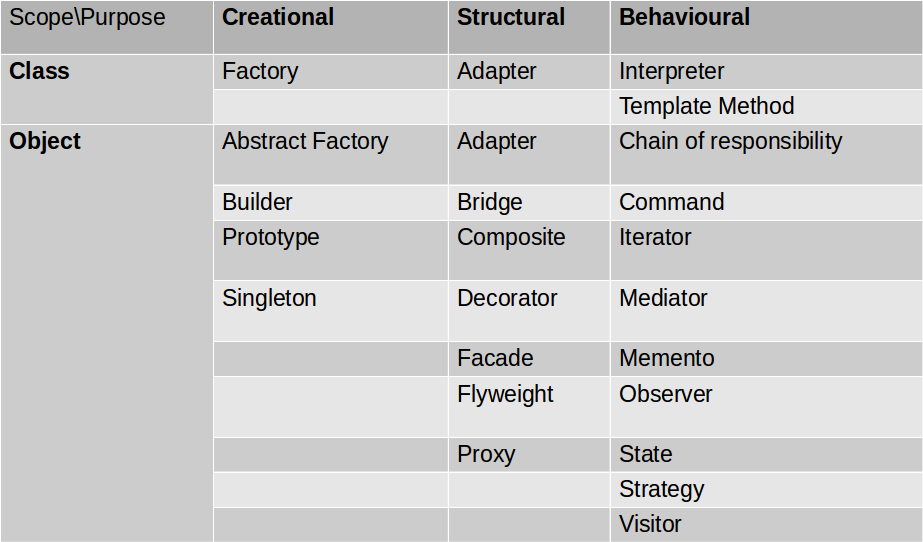

## Creational Patterns

- Factories
- Singletons
- Prototype
- Builder

## Factories

- Trivial in Python because
    - No *new* opertor
    - function and constructor look alike
    

## Factory Method

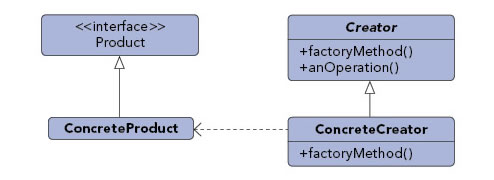

### AbstractFacory
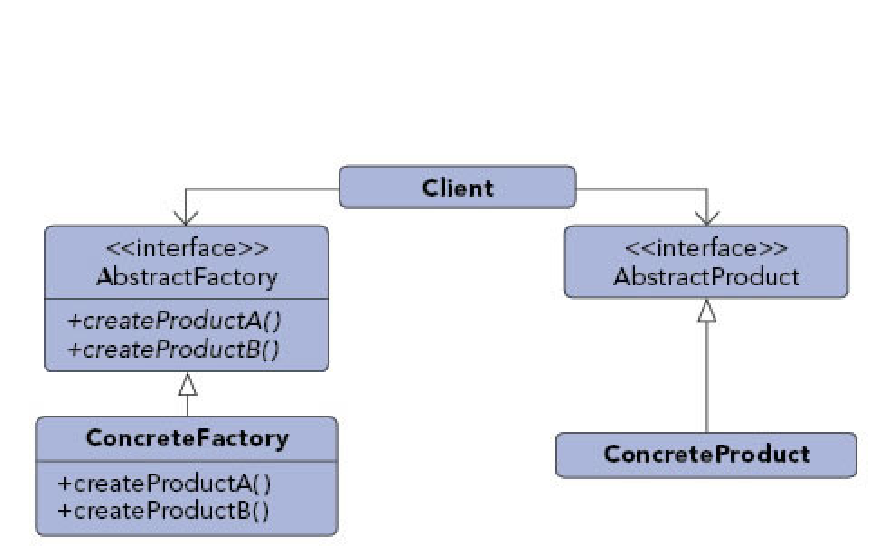

## Singletons

- Using a global variable is bad, because you can never switch in something dynamic: mymodule.foo can not be intercepted!
- You should always make callers
  actually invoke a function to get your singleton; minimally
- Can use *The Borg* (shared instance variables rather than single object) instead in Python

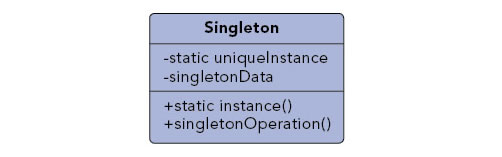

In [ ]:
# A kind-of singleton

_singleton = MyClass()
def get_singleton():
    return _singleton

## Singleton User Provided Class

In [ ]:
_singleton = None

def get_singleton(cls=MyClass):
    global _singleton
    if _singleton is None:
        _singleton = cls()
    return _singleton

## ProtoType
- Provided by Stdlib
- Copy module
  - Introspect and copy an object
  

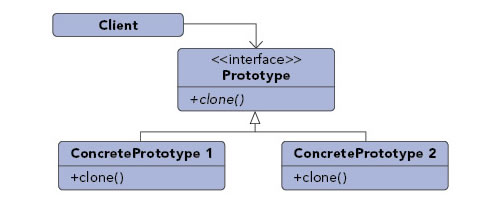

## Builder
- The most complex creational
pattern is actually very useful:
- a Builder receives instructions about
what to build, and hides the details
of the instances it links together

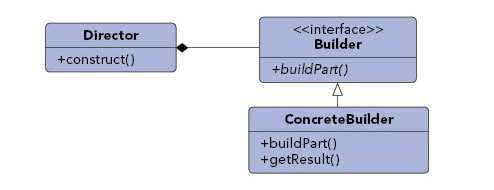

### XML without a builder

In [ ]:
m lxml import etree

root = etree.Element('body')
h1 = etree.Element('h1')
h1.text = 'The Title'
root.append(h1)
p = etree.Element('p')
p.text = 'Always write Python'
root.append(p)

### XML with a builder

In [ ]:
from lxml.builder import E

doc = E('body',
        E('h1', 'The Title'),
        E('p', 'Always write Python'))

## Creational Patterns Summary

- Designed away by language:
    - Abstract Factory
    - Factory Method

- Trivial:
    - Singleton
    - Prototype

- Useful:
    - Builder

## Structural Patterns
- Adapter
- Bridge
- Composite
- Facade
- Flyweight
- Proxy
- Decorator

## Adapter
- Very Useful
- Wraps one class so that it behaves like another class
- Supplies a single interface to a set of interfaces within a system.
- Use When
    - A simple interface is needed to provide access to a complex system. 
    - There are many dependencies between system implementations and clients. 
    - Systems and subsystems should be layered. 

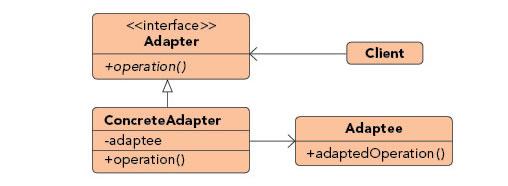

### Adapter example
- Sockets do not read and write like files do
- Tornado Future can wrap *asycio* or *trollis*

In [130]:
import socket
s = socket.socket()
s.read

AttributeError: '_socketobject' object has no attribute 'read'

- Instead, they “send” and “receive”

In [131]:
s.send

<function send>

In [132]:
s.recv

<function recv>

### Adapter in stdlib
- Standard Library provides
- socket._fileobject 
- file-like read() and write()
- operations into send() and recv()

In [133]:
f = s.makefile()
f.read

<bound method _fileobject.read of <socket._fileobject object at 0x7f906033eed0>>

## Bridge

- Says not to use subclassing for
two separate purposes in one class
- Then you wind up with

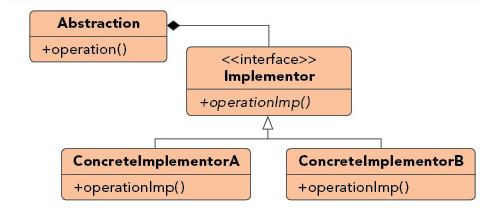

**Use When**

- Abstractions and implementations should not be bound at compile time. 
- Abstractions and implementations should be independently extensible. 
- Changes in the implementation of an abstraction should have no impact on clients. 
- Implementation details should be hidden from the client. 

- Partly rationalized by limitations
  of C++ (no mixins, much subclassing)

**Solution: another layer!**

- Have one class that translates
the Plain and Bordered ideas
into primitive window operations

Then

- Have another class that can
perform these operations under
Windows, Mac, and Linux

**This principle actually applies
at many levels in Python!**

**Question**

- My models are full of business
logic — how can I write simple tests
that don't write to the database?
    - Gary Bernhardt at PyCon 2012

In [ ]:
class Person(Database_Model):
    def rename(self, new_name): ...
    def direct_deposit(self, amount): ...

**Answer**
- Have models that do nothing but
persist information to storage
and then
- write a business logic layer
that implements the operations
that were expressed in methods
- Tests can call *dummy* presistance class

## Composite
- Class whose instances
are designed in a tree structure
- Composition is a common pattern

- email.Message can have messages inside
- lxml.etree.Element lists child elements

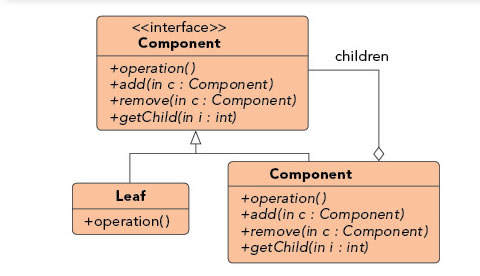

**Two common mechanisms:**

In [ ]:
# Store children in attributes

obj.attr = subobject

# Store a list or dict of children

obj.children = [subobject, ...]

**Use When**

- Hierarchical representations of objects are needed. 
- Objects and compositions of objects should be treated uniformly. 

## Facade

- An object that hides a complex
tree or network of other objects
- An etree Element lets you root.find()
and root.iter() which traverse the entire
tree of nodes for you

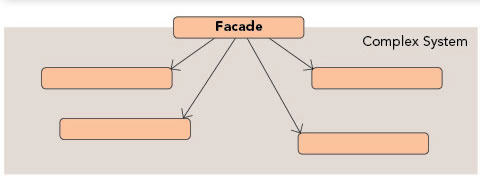

- Supplies a single interface to a set of interfaces within a system.
- Use When
    - A simple interface is needed to provide access to a complex system. 
    - There are many dependencies between system implementations and clients. 
    - Systems and subsystems should be layered. 

## Flyweight

- A flyweight is a small object
that is immutable and can be
- re-used in many contexts

![image.png](attachment:image.png)

- Facilitates the reuse of many fine grained objects, making the utilization of large numbers of objects more efficient.
- Use When
    - Many like objects are used and storage cost is high. 
    - The majority of each object's state can be made extrinsic. 
    - A few shared objects can replace many unshared ones. 
    - The identity of each object does not matter. 

**A text box implemented without flyweights**

In [ ]:
textbox.chars = [c1, c2, c3, ...]

c1.letter = 'T'
c1.width = 9
c1.height = 10
c1.depth = 0
c1.outline = [(0, 10), (9, 10), ...]
c1.x = 0
c1.y = 14
c1.draw()

c2.letter = 'h'
⋮
c3.letter = 'e'
⋮

- You have to create n instances
of the letter “T” so that each can
occupy a different x and y

In [ ]:
c1.letter = 'T'
c1.width = 9
c1.height = 10
c1.depth = 0
c1.outline = [(0, 10), (9, 10), ...]
c1.x = 0
c1.y = 14
c1.draw()

The flyweight pattern moves this
per-object state out into the
parent or larger context

In [ ]:
textbox.chars = [(cT, 0, 14),
                 (ch, 9, 14),
                 (ce, 18, 18),
                 (c_space, 27, 14),
                 (ch, 36, 14),
                 (ce, 45, 18),
                 ...]

cT.letter = 'T'
cT.width = 9
cT.height = 10
cT.depth = 0
cT.outline = [(0, 10), (9, 10), ...]
cT.draw(x, y)

### Flyweight
- A small set of objects can each
appear thousands of times inside
of parent objects
-But context like the x and y passed
    - to Character.draw(x, y) will now need
    - to be passed in to flyweight methods
-Saves memory at the expense of noise
and higher coupling

### Flyweight in stdlib

 C-Python uses the flyweight pattern
internally for integer objects

Since integer objects are immutable,
it only keeps a single copy of each small
integer like 0, 1, 2, ... and hands them
to your code over and over again

## Proxy

A proxy object wraps another object called
the subject and accepts method calls and
attribute lookups on its behalf
Proxying can be performed dynamically
in Python with **`__getattr__()`** instead of
having to write n proxying methods

### Proxy

- weakref.proxy(obj) returns a proxy
- Remote procedure call libraries offer
proxies for remote APIs, including the
Standard Library xmlrpc.client.ServerProxy
and also Pyro and rpyc
- The Zope web framework used proxies
that enforced security

![image.png](attachment:image.png)

- Allows for object level access control by acting as a pass through entity or a placeholder object.
- Use When
    - The object being represented is external to the system. 
    - Objects need to be created on demand. 
    - Access control for the original object is required. 
    - Added functionality is required when an object is accessed. 

## Decorator

- Like the Proxy, a Decorator class
offers the same attributes and methods
as the subject that it wraps

- But instead of being completely
transparent, it varies the behavior
or edits the data passing in and
out of the subject

- Decorators tend to appear in “glue”
code in applications, not inside
Python libraries themselves

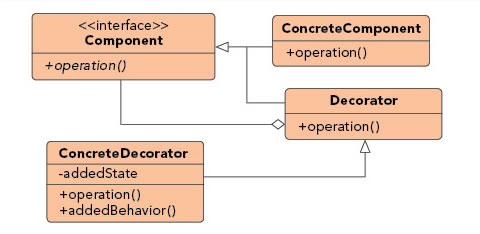

## Behavioral Patterns
- Chain of responsibility
- Command
- Interpreter
- Iterator
- Mediator
- Memento
- Observer
- State
- State
- Strategy
- Template
- Visitor

## Chain of responsibility

Pass a request along a chain of objects
until one of them decides to handle it

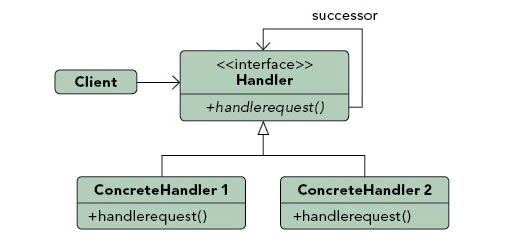

In [ ]:
def processClick(self, x, y):
    if self.active:
        self.buttonPress(x, y)
    else:
        self.next.processClick(x, y)

Used by GUIs and DOMs for mouse events
Can be used by “help” feature: maybe button
has no help, but enclosing form does

## Command

Replaces immediate actions like:

In [ ]:
paintLine(x1, y1, x2, y2)

Instead, you instantiate a command:

In [ ]:
cmd = PaintLineCommand(x1, y1, x2, y2)
cmd.do()
command_history.append(cmd)
Allows auditing and undo()

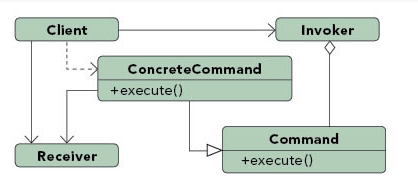

Crucial to version control systems

## Interpreter

Instead of compiling to machine language,
an interpreted language gets parsed into a
data structure that an interpreter program
iterates across, following the instructions
Data structure can be AST or bytecode
Python itself is interpreted!
Small domain-specific languages do sometimes
get written in Python to ease customization

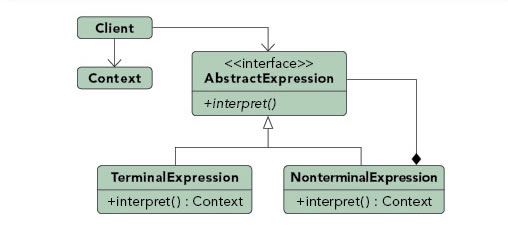

## Iterator

- Built-in because Python is awesome
- Introduced in 2001 — the most important
- Python innovation of decade
- See Raymond Hettinger's PyCodeConf 2011
  talk “What Makes Python Awesome?”
  

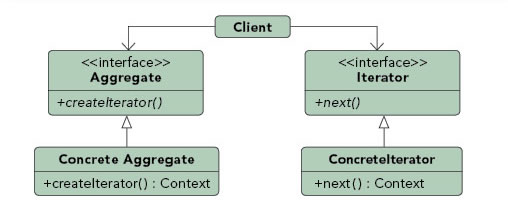

Lets you for x in obj: across your own
user-defined obj, or loop by hand
with `i = iter(obj)` and `i.next()`
Two basic ways to implement iterator
First, you can create an actual class
to be your iterator that remembers:
What it is iterating across
Where it is in the sequence

### Iterator

In [ ]:
class Box(object):
    def __init__(self): self.things = [10, 20, 30]
    def __iter__(self): return BoxIterator(self)

class BoxIterator(object):
    def __init__(self, box):
        self.box = box
        self.index = -1

    def next(self):
        self.index += 1
        if self.index >= len(self.box.things):
            raise StopIteration()
        return self.box.things[self.index]

**|Or, you can simply make**

In [ ]:
#__iter__() a generator
class Box(object):
    def __init__(self):
        self.things = [10, 20, 30]

    def __iter__(self):
        for thing in things:
            yield thing

### Iterator

- Very powerful pattern
- Eliminates ugly mechanics of iteration
so code is more readable
- Enhances re-use because code is
easy to lock together in new ways;
again, see Raymond's talk!
-  JavaScript is littered with:
for (var i=0; i < box.length; i++) ...

## Mediator

- Parent object responds to child events
and plays out their consequences for
other child objects
- Child objects like buttons or form fields
can remain generic instead of having to
be subclassed to learn specific behavior
- Children have no references to each other

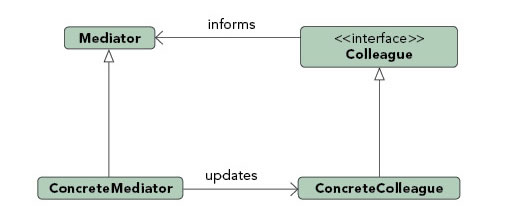

**Use When**

- Communication between sets of objects is well defined and complex. 
- Too many relationships exist and common point of control or communication is needed.
- Multiple objects need to notify the same list of observers

## Memento

- A memento is a record of an object's
internal state — might be a string, or
file, or complex data structure
- Callers ask an object instance for a
memento, then can hand it back later
to ask the object to restore itself
to its earlier state
- Similar to pickle but instead of
creating a new object like un-pickling,
it changes an existing object

## Observer

Without Observer pub-sub, you get:

In [ ]:
class MyModel(...):
    def set_total(self, number):
        self.total = number
        self.titlebar.update()
        self.graph.update()
        self.summary.update()

Note:
Very popular pattern in GUIs and DOMs
Display elements let the framework
know that they need to redraw when
specific model attributes change
Your models stay simple and have
no knowledge of the big application
you have build around them, so long
as they signal a list of listeners
when an attribute changes

With Observer pub-sub, things are simpler:

In [ ]:
class MyModel(...):
    def set_total(self, number):
        self.total = number

class MyTitlebar(...):
    def __init__(self, model):
        subscribe(model, 'total', self.redraw)

⋮

## State

In [ ]:
if state == 'start':
    if action == 'open':
        ⋮
    elif action == 'close':
        ⋮
elif state == 'open':
    if action == 'open':
        ⋮
    elif action == 'close':
        ⋮

### State

open()    close()
TCPStart → TCPOpen → TCPClosed
Represent each state as a class
like TCPOpen or TCPClosed
Give each class one method for
each transition like open()
and close() that returns the
next state
Avoids huge nested if-then's, but
simple state machines can be a dict
in Python instead

## Strategy

Parametrize a big process by passing in
an object that specifies custom behavior
Python has first-class functions so we
often just pass callbacks instead
A simple example of the Strategy pattern
is the key= function that we pass to
sorted() and list.sort()

## Template

Give your classes empty methods like
aboutToStart() and justStarted()
that a subclass can customize
The original author of threading in
the Standard Library intended callers to
subclass (!) Thread and provide their
own, more interesting run() method
In Python we often pass a callable instead,
or — when there are many callbacks — pass
a Strategy object instead

## Visitor

Replaces doThis() and doThat() methods on
tree nodes, that act on the current node and
then call the same method on their children,
with a do(action) traversal method
Not frequently encountered in Python
We tend to turn this problem inside out:
for node in lxml_root.walk():  # or os.walk!
    # do something to the node
Behavioral Patterns

Are big solutions for big problems
Most patterns work fine in Python
Many of them turn up in big and
popular libraries, or even in the
Standard Library
The Iterator pattern is now a
foundation of how we write Python/

---

# Regular Expressions

- Pattern matching
- Validation
- Searching, Replacing etc...

## re module

In [ ]:
import re

- search
- match
- sub
- finditer, findall
- compile

### Metachars

|Char    | Matches                        | example                    |
|:------|:--------------------------------|:----------------------------|
|**`.`**     |Match any character             |`foo.bar` foodbar             |
|**`^`**     |Match the beginning of line     |`^hi` lines starting "hi"     |
|**`$`**     | Match the end of line          |`hi$` lines ending "hi"       |
|**[ABC]** |Match A or B or C               |`h[ae]ll` hall, hell          |
|**[^DEF]**|Any character except D or E or F|`h[^ae]ll` h9ll but not hall  |
|**[A-Z]** |A character in the range A-Z    |`A[A-Z]T` ANT, but not AnT    |

### Special Character Sets
|Char|Meaning|
|--|:-------|
| **\w**|Word characters, same as `[A-Za-z0-9_]`|
| **\W**|Not word characters, same as `[^A-Za-z0-9_]`|
| **\d**|Digit same as `[0-9]`|
| **\D**|Not Digit, same as `[^0-9]`|
| **\s**|White space, that is space, tab, newline, vspace, hspace etc.|
| **\S**|Not whitespace|
| **\b**|Word break. Matches a word character to non word character transition or vice versa|

### Quantifiers
|Char|Number of matches|
|--|:-------|
| **\***|Any number of times|
| **+**|1 or more times|
| **?**|0 or 1|
| **{N,M}**|N,M are ints N <= mathes <=M|
| **{N,}**|At least N times (No max)|

# Profiling
- *__cProfile__* is a  deterministic profiling module for Python programs.  (Compiles in C) 
- A profile is a set of statistics that describes how often and for how long various parts of the program executed. 
- These statistics can be formatted into reports via the *__pstats__* module.

## Calling cProfile

In [ ]:
import cProfile
import re
cProfile.run('re.compile("foo|bar")')

**Output**

    197 function calls (192 primitive calls) in 0.002 seconds
    Ordered by: standard name
    ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  
     1    0.000    0.000    0.001    0.001 <string>:1(<module>)
     1    0.000    0.000    0.001    0.001 re.py:212(compile)
     1    0.000    0.000    0.001    0.001 re.py:268(_compile)
     1    0.000    0.000    0.000    0.000 sre_compile.py:172(_compile_charset)
     1    0.000    0.000    0.000    0.000 sre_compile.py:201(_optimize_charset)
     4    0.000    0.000    0.000    0.000 sre_compile.py:25(_identityfunction)
   3/1    0.000    0.000    0.000    0.000 sre_compile.py:33(_compile)`

### cProfile output columns
- **ncalls**
    for the number of calls,
- **tottime**
    for the total time spent in the given function (and excluding time made in calls to sub-functions)
- **percall**
    is the quotient of tottime divided by ncalls
- **cumtime**
    is the cumulative time spent in this and all subfunctions (from invocation till exit). This figure is accurate even for recursive functions.
- **percall**
    is the quotient of cumtime divided by primitive calls
- **filename:lineno(function)**
    provides the respective data of each function

### Calling cProfile
- shell `python -m cProfile -s tottime your_program.py`
- RunSnakeRun is GUI program for viewing cProfile

### Line Profiling
- Line by line profiling
- Finer grained

Note:
Sometimes the profiler may lump together methods calls from different parts of your code, or just won't be precise enough.

`pip install line_profiler`

Then, modify your code and decorate each function that you want to profile with @profile. Let's decorate our function so it will look like this:

In [ ]:
@profile
def write_sorted_letters(nb_letters=10**7):
    ...

You can then run your program through the line profiler like this:

`kernprof -l -v your_program.py`

- `-l` for line by line profile
- `-v` for immediately visualizing the results

### result

    Total time: 21.4412 s
    File: ./sort.py
    Function: write_sorted_letters at line 5
    Line #      Hits         Time    Per Hit   % Time  Line Contents
    ================================================================
     5                                             @profile
     6                                             def write_sorted_letters(nb_letters=10**7):
     7         1            1        1.0      0.0  random_string = ''
     8  10000001      3230206        0.3     15.1  for _ in range(nb_letters):
     9  10000000      9352815        0.9     43.6  random_string += random.choice('abcdefghijklmnopqrstuvwxyz')
    10         1      1647254  1647254.0      7.7  sorted_string = sorted(random_string)
    11                                           
    12         1         1334     1334.0      0.0  with open("sorted_text.txt", "w") as sorted_text:
    13  10000001      2899712        0.3     13.5  for character in sorted_string:
    14  10000000      4309926        0.4     20.1  sorted_text.write(character)

### Analysis
- First, note that this profiling tool is slowing down our program almost twofold, from 11 seconds to 21.

- But there is an upside: we have our program on the right hand side and can see which lines are impacting the performance of our application and how much so.

### Realtime Continuous  Profiling

- The integrated profiler is simple enough and can get you where you want in terms of performance for single-thread, local workloads. But a large, threaded, web application is a whole different beast.

- Let's have a look at the awesome Profiling module.

- First, install it with sudo pip install profiling, then run your program through it: profiling your_program.py. Don't forget to remove the @profile decorator that will only work with the line_profiler.

**Realtime Continuous Profiling Continued**

- It gives us a detailed tree-like view of the profile at the end of the program's run:


- It's interactive so you can navigate and fold/unfold each line by using the arrow keys.

- There is also a live mode for long running processes such as web servers. You can invoke it like this: profiling live-profile your_server_program.py. You can interact with it as your program is running to explore your program's performance profile as it runs.

---

# Identifying memory leaks

## The Muppy Module
Muppy allows you to get hold of all objects,

In [136]:
from pympler import muppy
all_objects = muppy.get_objects()
len(all_objects)                           

79587

Note:
Muppy tries to help developers to identity memory leaks of Python applications. It enables the tracking of memory usage during runtime and the identification of objects which are leaking. Additionally, tools are provided which allow to locate the source of not released objects.

Muppy is (yet another) Memory Usage Profiler for Python. The focus of this toolset is laid on the identification of memory leaks. Let's have a look what you can do with muppy.
The muppy module

### Using The Muppy Module
or filter out certain types of objects.

In [137]:
import types
my_types = muppy.filter(all_objects, Type=types.ClassType)
len(my_types)

170

In [180]:
for t in my_types[:10]:
    print t

UserDict.UserDict
UserDict.IterableUserDict
abc._C
UserDict.DictMixin
os._Environ
sre_parse.Pattern
sre_parse.SubPattern
sre_parse.Tokenizer
re.Scanner
codecs.Codec


Note:
This result, for example, tells us that the number of lists remained the same, but the memory allocated by lists has increased by 8 bytes. The correct increase for a LP64 system (see 64-Bit_Programming_Models).
The summary module

### You can create summaries

In [139]:
from pympler import summary
sum1 = summary.summarize(all_objects)
summary.print_(sum1)

                                      types |   # objects |   total size
=========================================== | =========== | ============
                                       dict |        5645 |      5.41 MB
                                        str |       29546 |      3.15 MB
                                       code |        8724 |      1.06 MB
                                    unicode |        2209 |    873.66 KB
                                       type |         919 |    816.30 KB
                                        set |        1219 |    394.18 KB
                                       list |        3063 |    368.38 KB
                                      tuple |        3735 |    277.30 KB
                                    weakref |        2347 |    201.70 KB
  <class 'traitlets.traitlets.MetaHasTraits |         180 |    158.91 KB
                        <class 'abc.ABCMeta |         171 |    151.12 KB
                         wrapper_descriptor |      

### Compare them with other summaries.

In [141]:
sum2 = summary.summarize(muppy.get_objects())
diff = summary.get_diff(sum1, sum2)
summary.print_(diff)                          

                          types |   # objects |   total size
=============================== | =========== | ============
                           list |       17306 |      2.35 MB
                            str |       11550 |    692.49 KB
                            int |        1266 |     29.67 KB
                           dict |          27 |     14.13 KB
                        unicode |          33 |      7.66 KB
  <class 'zmq.sugar.frame.Frame |           7 |      1.31 KB
                          tuple |          18 |      1.08 KB
              method_descriptor |          12 |    864     B
             wrapper_descriptor |          10 |    800     B
                        weakref |           7 |    616     B
              <class '_ast.Name |           9 |    576     B
                 instancemethod |           7 |    560     B
                           cell |           9 |    504     B
            function (<lambda>) |           3 |    360     B
              member_des

## The tracker module

In [142]:
from pympler import tracker
tr = tracker.SummaryTracker()
tr.print_diff()

                                      types |   # objects |   total size
=========================================== | =========== | ============
                                       list |        5762 |    587.30 KB
                                        str |        5759 |    343.74 KB
                                        int |         622 |     14.58 KB
                      function (store_info) |           1 |    120     B
                                    weakref |           1 |     88     B
                   <class '_ast.Interactive |           1 |     64     B
                                thread.lock |          -1 |    -32     B
                        <class '_ast.Module |          -1 |    -64     B
  <class 'tornado.stack_context.NullContext |          -1 |    -64     B
                 builtin_function_or_method |          -1 |    -72     B
                               listiterator |          -2 |   -128     B
                             instancemethod |      

Note:
A tracker object creates a summary (that is a summary which it will remember) on initialization. Now whenever you call tracker.print_diff(), a new summary of the current state is created, compared to the previous summary and printed to the console. As you can see here, quite a few objects got in between these two invocations. But if you don't do anything, nothing will change.

**Diff 2**

In [143]:
tr.print_diff()                               

                    types |   # objects |   total size
========================= | =========== | ============
                      str |          10 |      1.04 KB
                  unicode |           3 |    836     B
                    tuple |           3 |    232     B
                     cell |           3 |    168     B
                     list |           0 |    144     B
                     code |           1 |    128     B
      function (<lambda>) |           1 |    120     B
              thread.lock |           1 |     32     B
                    float |           1 |     24     B
                      int |          -2 |    -48     B
        <class '_ast.Call |          -1 |    -64     B
       <class '_ast.alias |          -1 |    -64     B
      <class '_ast.Assign |          -1 |    -64     B
  <class '_ast.ImportFrom |          -1 |    -64     B
   <class '_ast.Attribute |          -1 |    -64     B


**Now check out this code snippet**

In [144]:
i = 1
l = [1,2,3,4]
d = {}
tr.print_diff()                               

                       types |   # objects |   total size
============================ | =========== | ============
                        dict |           8 |      2.19 KB
                     unicode |           7 |      1.39 KB
                        list |          12 |      1.15 KB
                         str |           9 |   1007     B
                       tuple |          10 |    728     B
            <class '_ast.Num |           5 |    320     B
           <class '_ast.Name |           3 |    192     B
         <class '_ast.Assign |           3 |    192     B
                        cell |           3 |    168     B
                listiterator |           2 |    128     B
         function (<lambda>) |           1 |    120     B
                     weakref |           1 |     88     B
              instancemethod |           1 |     80     B
  builtin_function_or_method |           1 |     72     B
           <class '_ast.List |           1 |     64     B


Note:
As you can see both, the new list and the new dict appear in the summary, but not the 4 integers used. Why is that? Because they existed already before they were used here, that is some other part in the Python interpreter code makes already use of them. Thus, they are not new.
The refbrowser module

## Reference Browser
In case some objects are leaking and you don't know where they are still referenced, you can use the referrers browser. At first let's create a root object which we then reference from a tuple and a list.

In [146]:
from pympler import refbrowser
root = "some root object"
root_ref1 = [root]
root_ref2 = (root, )

def output_function(o):
    return str(type(o))

In [147]:
cb = refbrowser.ConsoleBrowser(root, maxdepth=2, str_func=output_function)

## ConsoleBrowser
Then we create a ConsoleBrowser, which will give us a referrers tree starting at root, printing to a maximum depth of 2, and uses str_func to represent objects. Now it's time to see where we are at.

In [148]:
>>> cb.print_tree()

<type 'str'>-+-<type 'list'>--<type 'dict'>
             +-<type 'tuple'>--<type 'dict'>
             +-<type 'dict'>-+-<type 'function'>
                             +-<type 'frame'>
                             +-<type 'frame'>
                             +-<type 'frame'>
                             +-<type 'frame'>
                             +-<type 'dict'>
                             +-<type 'module'>
                             +-<type 'dict'>
                             +-<type 'dict'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
                             +-<type 'function'>
      

Note:
What we see is that the root object is referenced by the tuple and the list, as well as by three dictionaries. These dictionaries belong to the environment, e.g. the ConsoleBrowser we just started and the current execution context.

---

# Performance Tips


1. Get it right.
2. Test it's right.
3. Profile if slow.
4. Optimise.
5. Repeat from 2.

Note:
you can only know what makes your program slow after first getting the program to give correct results, then running it to see if the correct program is slow. When found to be slow, profiling can show what parts of the program are consuming most of the time. A comprehensive but quick-to-run test suite can then ensure that future optimizations don't change the correctness of your program. In short:

Certain optimizations amount to good programming style and so should be learned as you learn the language. An example would be moving the calculation of values that don't change within a loop, outside of the loop.

## Choose the Right Data Structure
if ...
- del anylist[0]
- anylist.pop(0)
- anylist.insert(0,o)

then ...

use **deque**

** Do not do this **

In [ ]:
s = ""
for substring in list:
    s += substring

- Use `s = "".join(list)` instead. 
- The former is a very common and catastrophic mistake when building large strings. Similarly, if you are generating bits of a string sequentially instead of:

## Loops
- Loop *may* be less efficient than
   - map
   - filter
   - reduce

Note:
Python supports a couple of looping constructs. The for statement is most commonly used. It loops over the elements of a sequence, assigning each to the loop variable. If the body of your loop is simple, the interpreter overhead of the for loop itself can be a substantial amount of the overhead. This is where the map function is handy. You can think of map as a for moved into C code. The only restriction is that the "loop body" of map must be a function call. Besides the syntactic benefit of list comprehensions, they are often as fast or faster than equivalent use of map.

### Example Loop -> Map

In [ ]:
newlist = []
for word in oldlist:
    newlist.append(word.upper())

- you can use map to push the loop from the interpreter into compiled C code:
- Avoid attribute lookups by caching in a local, especially if it's occurring in a high-iteration loop. Everything that doesn't change can be cached as local variables, even instance methods. (This is one of the optimizations that the pypy JIT does automatically)

## Guido van Rossums Tips
- Avoid overengineering datastructures. Tuples are better than objects (try namedtuple too though). Prefer simple fields over getter/setter functions.

- Built-in datatypes are your friends. Use more numbers, strings, tuples, lists, sets, dicts. Also check out the collections library, esp. deque.

- Be suspicious of function/method calls; creating a stack frame is expensive.

- Don't write Java (or C++, or Javascript, ...) in Python.

- Are you sure it's too slow? Profile before optimizing!

- The universal speed-up is rewriting small bits of code in C. Do this only when all else fails.

## Avoiding dots...

In [ ]:
upper = str.upper
newlist = []
append = newlist.append
for word in oldlist:
    append(upper(word))

Note:
Suppose you can't use map or a list comprehension? You may be stuck with the for loop. The for loop example has another inefficiency. Both newlist.append and word.upper are function references that are reevaluated each time through the loop. The original loop can be replaced with:

This technique should be used with caution. It gets more difficult to maintain if the loop is large. Unless you are intimately familiar with that piece of code you will find yourself scanning up to check the definitions of append and upper.

### Local Variables
- Local faster than global

Note:
The final speedup available to us for the non-map version of the for loop is to use local variables wherever possible. If the above loop is cast as a function, append and upper become local variables. Python accesses local variables much more efficiently than global variables.

### Import Statement Overhead
- import only what is needed
- put imports in conditional 

Note:
import statements can be executed just about anywhere. It's often useful to place them inside functions to restrict their visibility and/or reduce initial startup time. Although Python's interpreter is optimized to not import the same module multiple times, repeatedly executing an import statement can seriously affect performance in some circumstances.

### Data Aggregation
- Loop inside function

Note:
Function call overhead in Python is relatively high, especially compared with the execution speed of a builtin function. This strongly suggests that where appropriate, functions should handle data aggregates. Here's a contrived example written in Python.

In [ ]:
x = 0
def doit1(i):
    global x
    x = x + i

list = range(100000)
t = time.time()
for i in list:
    doit1(i)

In [ ]:
import time
x = 0
def doit2(list):
    global x
    for i in list:
        x = x + i


### Doing Stuff Less Often
- **sys.setcheckinterval**

Note:
The Python interpreter performs some periodic checks. In particular, it decides whether or not to let another thread run and whether or not to run a pending call (typically a call established by a signal handler). Most of the time there's nothing to do, so performing these checks each pass around the interpreter loop can slow things down. There is a function in the sys module, setcheckinterval, which you can call to tell the interpreter how often to perform these periodic checks. Prior to the release of Python 2.3 it defaulted to 10. In 2.3 this was raised to 100. If you aren't running with threads and you don't expect to be catching many signals, setting this to a larger value can improve the interpreter's performance, sometimes substantially.

### Use xrange instead of range
- range creates a real lis
- use more memory
- generators rather than structures
- Py3 converts mant

### Re-map Functions at runtime

- Say you have a function

In [ ]:
class Test:
    def check(self,a,b,c):
        if a == 0:
            self.str = b*100
        else:
            self.str = c*100

In [ ]:
a = Test()
def example():
    for i in xrange(0,100000):
        a.check(i,"b","c")

In [ ]:
import profile
profile.run("example()")

And suppose this function gets called from somewhere else many times.

Well, your check will have an if statement slowing you down all the time except the first time, so you can do this:

** If runs only once **

In [ ]:
class Test2:
    def check(self,a,b,c):
        self.str = b*100
        self.check = self.check_post
    def check_post(self,a,b,c):
        self.str = c*100

In [ ]:
a = Test2()
def example2():
    for i in xrange(0,100000):
        a.check(i,"b","c")

import profile
profile.run("example2()")

---

# Multithreading
- Multitasking
- Multiprocessing
- Multicore
- Explicit VS Implicit Multii-Threading

## GIL
- Global Interpreter Lock
- Only one python implicit thread runs concurrently per processor
- Implicit threads cannot be used to achieve multiprocessing.

## Thread and Threading
- thread package low level
    - only use thead.lock
- threaing
    - Thread class

## Using threading.Thread
- Constructor

In [ ]:
Thread(group=None, target=None, name=None, 
       args=(), kwargs=None, verbose=None)

- Should be called with named args as the order of the signature may be altered in future.

## Thread constructor args
- **`group`** should be None; reserved for future extension when a ThreadGroup class is implemented.

- **`target`** is the callable object to be invoked by the `run()` method. 

- **`name`** is the thread name. Defaults to a "Thread-N" where N is a unique int.
- **`args`**, **`kwargs`** arguments for *target*, empty by default.

## Two Approaches to Thread
- Two approaches subclass thread and overide *run*
- Set target to existing function
- `start()` calls *run* or *target* if not None

## Trivial Example

In [ ]:
from threading import Thread
from time import sleep

def timeout_message(message=None, repeat=3, timeout=5):
    def target():
        for i in range(repeat):
            sleep(timeout)
            print '\n'+message
    
    Thread(target=target).start()
    raw_input('Press Enter when done')

timeout_message('hello')

### Daemonization?
- A *thread* is said to be a *daemon* if python can terminate in spite of *thread*.
- The previous example does not terminate unless both *&lt;enter&gt;* has been pressed and `target()`  has completed.

To Daemonize, replace:

In [ ]:
    Thread(target=target).start()

With:

In [ ]:
     t = Thread(target=target)
     t.setDaemon(1)
     t.start()

## Local Storage
- `l=threading.Local()`
- `l.get()`, `l.set()`   return differnt values for each *thread*.
- `l.__dict__` Contains values

- See the primes example.

## Safe Multi Threading
- All External Resources must be handled by a single thread.
- All other threads mus communicate via an *atomic* messaging system. e.g.:
    - Queue Module
    - Database
- OR use locks
- The logging module uses locks.

Note:
[Excellent talk by Raymond Hettinger](https://youtu.be/Bv25Dwe84g0)
[slides](https://dl.dropboxusercontent.com/u/3967849/pyru/_build/html/threading.html)

### Atomic operations
- reading or replacing a single instance attribute
- reading or replacing a single global variable
- fetching an item from a list
- modifying a list in place (e.g. adding an item using append)
- fetching an item from a dictionary
- modifying a dictionary in place (e.g. adding an item, or calling the clear method)

## Locking
- Locks 
- most fundamental synchronization mechanism

Note:
Locks are the most fundamental synchronization mechanism provided by the threading module. At any time, a lock can be held by a single thread, or by no thread at all. If a thread attempts to hold a lock that's already held by some other thread, execution of the first thread is halted until the lock is released.

Locks are typically used to synchronize access to a shared resource. For each shared resource, create a Lock object. When you need to access the resource, call acquire to hold the lock (this will wait for the lock to be released, if necessary), and call release to release it:

In [ ]:
lock = Lock()

lock.acquire() # will block if lock is already held
... access shared resource
lock.release()

### Always release

In [ ]:
lock.acquire()
try:
    ... access shared resource
finally:
    lock.release() # release lock, no matter what

Note:
- For proper operation, it's important to release the lock even if something goes wrong when accessing the resource. You can use try-finally for this purpose:

### Lock and with

In [ ]:
from __future__ import with_statement # 2.5 only

with lock:
    ... access shared resource

The acquire method takes an optional wait flag, which can be used to avoid blocking if the lock is held by someone else. If you pass in False, the method never blocks, but returns False if the lock was already held:

In [ ]:
if not lock.acquire(False):
    ... failed to lock the resource
else:
    try:
        ... access shared resource
    finally:
        lock.release()

Note:
In Python 2.5 and later, you can also use the with statement. When used with a lock, this statement automatically acquires the lock before entering the block, and releases it when leaving the block:

### lock.locked?

In [ ]:
if not lock.locked():
    # some other thread may run before we get
    # to the next line
    lock.acquire() # may block anyway

Note:
You can use the locked method to check if the lock is held. Note that you cannot use this method to determine if a call to acquire would block or not; some other thread may have acquired the lock between the method call and the next statement.

## Problems with Simple Locking 
- Locks are difficult to manage
- Hard to reason about

Note: 
The standard lock object doesn't care which thread is currently holding the lock; if the lock is held, any thread that attempts to acquire the lock will block, even if the same thread is already holding the lock. Consider the following example:

### Locking problem example

In [ ]:
lock = threading.Lock()

def get_first_part():
    lock.acquire()
    try:
        ... fetch data for first part from shared object
    finally:
        lock.release()
    return data

In [ ]:
def get_second_part():
    lock.acquire()
    try:
        ... fetch data for second part from shared object
    finally:
        lock.release()
    return data

Note:
Here, we have a shared resource, and two access functions that fetch different parts from the resource. The access functions both use locking to make sure that no other thread can modify the resource while we're accessing it.

## Re-Entrant Locks (RLock) 
- rlock only if lock is held by another thread

Note:
The RLock class is a version of simple locking that only blocks if the lock is held by another thread. While simple locks will block if the same thread attempts to acquire the same lock twice, a re-entrant lock only blocks if another thread currently holds the lock. If the current thread is trying to acquire a lock that it's already holding, execution continues as usual.

### Rlock example

In [ ]:
lock = threading.Lock()
lock.acquire()
lock.acquire() # this will block

lock = threading.RLock()
lock.acquire()
lock.acquire() # this won't block

Note:
The main use for this is nested access to shared resources, as illustrated by the example in the previous section. To fix the access methods in that example, just replace the simple lock with a re-entrant lock, and the nested calls will work just fine.

## Semaphores 
- advanced lock
- counter not flag
- allows multiple but limitted no. threads 

Note:
A semaphore is a more advanced lock mechanism. A semaphore has an internal counter rather than a lock flag, and it only blocks if more than a given number of threads have attempted to hold the semaphore. Depending on how the semaphore is initialized, this allows multiple threads to access the same code section simultaneously.

### Semaphore Example

In [ ]:
semaphore = threading.BoundedSemaphore()
semaphore.acquire() # decrements the counter
... access the shared resource
semaphore.release() # increments the counter

Note:
The counter is decremented when the semaphore is acquired, and incremented when the semaphore is released. If the counter reaches zero when acquired, the acquiring thread will block. When the semaphore is incremented again, one of the blocking threads (if any) will run.

Semaphores are typically used to limit access to resource with limited capacity, such as a network connection or a database server. Just initialize the counter to the maximum number, and the semaphore implementation will take care of the rest.

`max_connections = 10`

semaphore = threading.BoundedSemaphore(max_connections)
If you don't pass in a value, the counter is initialized to 1.

Python's threading module provides two semaphore implementations; the Semaphore class provides an unlimited semaphore which allows you to call release any number of times to increment the counter. To avoid simple programming errors, it's usually better to use the BoundedSemaphore  class, which considers it to be an error to call release more often than you've called acquire.

## Events

In [ ]:
event = threading.Event()

# a client thread can wait for the flag to be set
event.wait()

# a server thread can set or reset it
event.set()
event.clear()

Note:
An event is a simple synchronization object; the event represents an internal flag, and threads can wait for the flag to be set, or set or clear the flag themselves.

If the flag is set, the wait method doesn't do anything. If the flag is cleared, wait will block until it becomes set again. Any number of threads may wait for the same event.

## Conditions 
- advanced event
- thread can wait condition to *notify*

Note:
A condition is a more advanced version of the event object. A condition represents some kind of state change in the application, and a thread can wait for a given condition, or signal that the condition has happened. Here's a simple consumer/producer example. First, you need a condition object:

### represents the addition of an item to a resource

In [ ]:
condition = threading.Condition()

Note:
The producing thread needs to acquire the condition before it can notify the consumers that a new item is available:

### producer thread

In [ ]:
... generate item
condition.acquire()
... add item to resource
condition.notify() # signal that a new item is available
condition.release()

Note:
The consumers must acquire the condition (and thus the related lock), and can then attempt to fetch items from the resource:

### consumer thread

In [ ]:
condition.acquire()
while True:
    ... get item from resource
    if item:
        break
    condition.wait() # sleep until item becomes available
condition.release()
... process item

Note:
The wait method releases the lock, blocks the current thread until another thread calls notify or notifyAll on the same condition, and then reacquires the lock. If multiple threads are waiting, the notify method only wakes up one of the threads, while notifyAll always wakes them all up.

To avoid blocking in wait, you can pass in a timeout value, as a floating-point value in seconds. If given, the method will return after the given time, even if notify hasn't been called. If you use a timeout, you must inspect the resource to see if something actually happened.

Note that the condition object is associated with a lock, and that lock must be held before you can access the condition. Likewise, the condition lock must be released when you're done accessing the condition. In production code, you should use `try`-`finally` or with, as shown earlier.

To associate the condition with an existing lock, pass the lock to the Condition constructor. This is also useful if you want to use several conditions for a single resource:

`lock = threading.RLock()`

`condition_1 = threading.Condition(lock)`

`condition_2 = threading.Condition(lock)`

## Queue Module
- provides a FIFO
    - first-in, first-out
- suitable for multi-threading
    - Locking for caller

Note:
The Queue module provides a FIFO implementation suitable for multi-threaded programming. It can be used to pass messages or other data between producer and consumer threads safely. Locking is handled for the caller, so it is simple to have as many threads as you want working with the same Queue instance. A Queue's size (number of elements) may be restricted to throttle memory usage or processing.

The Queue class implements a basic first-in, first-out container. Elements are added to one “end” of the sequence using `put()`, and removed from the other end using `get()`.

In [ ]:
import Queue

q = Queue.Queue()

for i in range(5):
    q.put(i)

while not q.empty():
    print q.get()

Note:
This example uses a single thread to illustrate that elements are removed from the queue in the same order they are inserted.

### LIFO Queue
- LifoQueue
- last-in, first-out
- stack

Note:
In contrast to the standard FIFO implementation of Queue, the LifoQueue uses last-in, first-out ordering (normally associated with a stack data structure).
|||

In [ ]:
import Queue

q = Queue.LifoQueue()

for i in range(5):
    q.put(i)

while not q.empty():
    print q.get()

- The item most recently put() into the queue is removed by get().

### Priority Queue
- PriorityQueue
- Uses the sort order

Note:
Sometimes the processing order of the items in a queue needs to be based on characteristics of those items, rather than just the order they are created or added to the queue. For example, print jobs from the payroll department may take precedence over a code listing printed by a developer. PriorityQueue uses the sort order of the contents of the queue to decide which to retrieve.

In [ ]:
import Queue

class Job(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description
        print 'New job:', description
        return
    def __cmp__(self, other):
        return cmp(self.priority, other.priority)

In [ ]:
q = Queue.PriorityQueue()

q.put( Job(3, 'Mid-level job') )
q.put( Job(10, 'Low-level job') )
q.put( Job(1, 'Important job') )

In [ ]:
while not q.empty():
    next_job = q.get()
    print 'Processing job:', next_job.description

In this single-threaded example, the jobs are pulled out of the queue in strictly priority order. If there were multiple threads consuming the jobs, they would be processed based on the priority of items in the queue at the time get() was called.

    $ python Queue_priority.py
    
    New job: Mid-level job
    New job: Low-level job
    New job: Important job
    Processing job: Important job
    Processing job: Mid-level job
    Processing job: Low-level job

### Using Queues with Threads
- printing to the terminal is not a "thread safe"
- Edit primes example to place all `print` statements in a single thread
- Use Queue to send messages for printing

# Parallell Processing
- GIL Prevents Genuine Parallel Processing
- Have to explicit multi-threading or multi-processing

Note: 
CPUs with multiple cores have become the standard in the recent
development of modern computer architectures and we can not only find
them in supercomputer facilities but also in our desktop machines at
home, and our laptops; even Apple’s iPhone 5S got a 1.3 Ghz Dual-core
processor in 2013.

However, the default Python interpreter was designed with simplicity in
mind and has a thread-safe mechanism, the so-called “GIL” (Global
Interpreter Lock). In order to prevent conflicts between threads, it
executes only one statement at a time (so-called serial processing, or
single-threading).

In this introduction to Python’s `multiprocessing`
module, we will see how we can spawn multiple subprocesses to avoid some
of the GIL’s disadvantages.

### Multi-Threading vs. Multi-Processing

Note:

Depending on the application, two common approaches in parallel
programming are either to run code via threads or multiple processes,
respectively. If we submit “jobs” to different threads, those jobs can
be pictured as “sub-tasks” of a single process and those threads will
usually have access to the same memory areas (i.e., shared memory). This
approach can easily lead to conflicts in case of improper
synchronization, for example, if processes are writing to the same
memory location at the same time.

A safer approach (although it comes with an additional overhead due to
the communication overhead between separate processes) is to submit
multiple processes to completely separate memory locations (i.e.,
distributed memory): Every process will run completely independent from
each other.

## The `Process` class

In [ ]:
import multiprocessing as mp
import random
import string

random.seed(123)

# Define an output queue
output = mp.Queue()

# define a example function
def rand_string(length, output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    rand_str = ''.join(random.choice(
                        string.ascii_lowercase
                        + string.ascii_uppercase
                        + string.digits)
                   for i in range(length))
    output.put(rand_str)

Note:

The most basic approach is probably to use the
`Process`  class from the
`multiprocessing`  module.
Here, we will use a simple queue function to compute the cubes for the 6
numbers 1, 2, 3, 4, 5, and 6 in 6 parallel processes.

**Setup a list of processes that we want to run**

In [ ]:
processes = [mp.Process(target=rand_string, args=(5, output)) for x in range(4)]

**Run processes**

In [ ]:
for p in processes:
    p.start()

**Exit the completed processes**

In [ ]:
for p in processes:
    p.join()

**Get process results from the output queue**

In [ ]:
results = [output.get() for p in processes]

print(results)
['BJWNs', 'GOK0H', '7CTRJ', 'THDF3']

### Ordered Results

In [ ]:
    output.put((pos, rand_str))
...
[(0, 'h5hoV'), (1, 'fvdmN'), (2, 'rxGX4'), (3, '8hDJj')]

Note:
The order of the obtained results does not necessarily have to match the
order of the processes (in the `processes` list).
Since we eventually use the `.get()` method to
retrieve the results from the `Queue` sequentially,
the order in which the processes finished determines the order of our
results.
E.g., if the second process has finished just before the first process,
the order of the strings in the `results` list could
have also been
`['PQpqM', 'yzQfA', 'SHZYV', 'PSNkD']` instead of
`['yzQfA', 'PQpqM', 'SHZYV', 'PSNkD']`

### The `Pool` class

Another and more convenient approach for simple parallel processing
tasks is provided by the `Pool` class.

There are four methods that are particularly interesing:

-   `Pool.apply`

-   `Pool.map`

-   `Pool.apply_async`

-   `Pool.map_async`



The `Pool.apply` and `Pool.map`
methods are basically equivalents to Python’s in-built
[`apply`](https://docs.python.org/2/library/functions.html#apply)
and
[`map`](https://docs.python.org/2/library/functions.html#map)
functions.
Before we come to the `async` variants of the
`Pool` methods, let us take a look at a simple
example using `Pool.apply` and
`Pool.map`. Here, we will set the number of
processes to 4, which means that the `Pool` class
will only allow 4 processes running at the same time.

In [ ]:
def cube(x):
    return x**3

pool = mp.Pool(processes=4)
results = [pool.apply(cube, args=(x,)) for x in range(1,7)]
print(results)
...
[1, 8, 27, 64, 125, 216]

In [ ]:
pool = mp.Pool(processes=4)
results = pool.map(cube, range(1,7))
print(results)

</div>

<div class="highlighter-rouge">

In [ ]:
[1, 8, 27, 64, 125, 216]

Note:
The `Pool.map` and `Pool.apply`
will lock the main program until all a process is finished, which is
quite useful if we want to obtain resuls in a particular order for
certain applications.
In contrast, the `async` variants will submit all
processes at once and retrieve the results as soon as they are finished.
One more difference is that we need to use the `get`
method after the `apply_async()` call in order to
obtain the `return` values of the finished
processes.

In [ ]:
pool = mp.Pool(processes=4)
results = [pool.apply_async(cube, args=(x,)) for x in range(1,7)]
output = [p.get() for p in results]
print(output)
...
[1, 8, 27, 64, 125, 216]

---

# Forking other processes

- os.system
- os.popen
- subprocess

## os.system

In [151]:
import os
help(os.system)

Help on built-in function system in module posix:

system(...)
    system(command) -> exit_status
    
    Execute the command (a string) in a subshell.



In [153]:
os.system('echo hello')
#prints hello, returns 0 exit status of the shell

0

## os.popen2 (deprecated)

    help on function popen2 in module os:
     
    popen2(cmd, mode='t', bufsize=-1)
        Execute the shell command 'cmd' in a sub-process.  On UNIX, 'cmd'
        may be a sequence, in which case arguments will be passed directly to
       the program without shell intervention (as with os.spawnv()).  If 'cmd'
       is a string it will be passed to the shell (as with os.system()). If
       'bufsize' is specified, it sets the buffer size for the I/O pipes.  The
       file objects (child_stdin, child_stdout) are returned.

In [154]:
fw,fr = os.popen2('wc -l')
fw.write("the quick\n brown fox \n juped\n over"+chr(0))
fw.close()
fr.read()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: os.popen2 is deprecated.  Use the subprocess module.
  """Entry point for launching an IPython kernel.


'3\n'

## subprocess

This module allows you to spawn processes, connect to their
input/output/error pipes, and obtain their return codes.  This module
intends to replace several older modules and functions:
    
- os.system
- os.spawn*
- os.popen*
- popen2.*
- commands.*

## subprocess.Popen class

In [ ]:
Popen(args, bufsize=0, executable=None,
      stdin=None, stdout=None, stderr=None,
      preexec_fn=None, close_fds=False, shell=False,
      cwd=None, env=None, universal_newlines=False,
      startupinfo=None, creationflags=0):

## Popen arguments
- **args**: A sequence containing the command and its arguments
- **stdout, stderr, stdin**: Standard file descriptors may be assigned to:
    - PIPE: will be piped from another process
    - file object (existing file)
    - file descriptor (existing file) 

## Popen examples

In [ ]:
#shell command
output=`mycmd myarg`

Becomes

In [ ]:
from subprocess import Popen,PIPE
output = Popen(["mycmd", "myarg"], stdout=PIPE).communicate()[0]

### Popen object methods

In [ ]:
communicate(self, input=None)

Interact with process: Send data to *stdin*.  Read data from
and *stderr*, until end-of-file is reached.  Wait for
to terminate.  The optional input argument should be a
to be sent to the child process, or None, if no data
be sent to the child.
`communicate()` returns a tuple (*stdout*, *stderr*).

### Replacing shell pipe line

In [ ]:
#shell command
output=`dmesg | grep hda`

Becomes

In [ ]:
p1 = Popen(["dmesg"], stdout=PIPE)
p2 = Popen(["grep", "hda"], stdin=p1.stdout, stdout=PIPE)
output = p2.communicate()[0]

## subprocess functions
`call(*popenargs, **kwargs):`
Run command with arguments.  Wait for command to complete, then
return the returncode attribute.
    
The arguments are the same as for the Popen constructor.  Example:

In [ ]:
retcode = call(["ls", "-l"])

`check_call(*popenargs, **kwargs):`
Run command with arguments.  Wait for command to complete.  If the
exit code was zero then return, otherwise raise
CalledProcessError.  The CalledProcessError object will have the
return code in the returncode attribute.

The arguments are the same as for the Popen constructor.  Example:

In [ ]:
check_call(["ls", "-l"])

`check_output(*popenargs, **kwargs):`
Run command with arguments and return its output as a byte string.

If the exit code was non-zero it raises a CalledProcessError.  The
CalledProcessError object will have the return code in the returncode
attribute and output in the output attribute.

The arguments are the same as for the Popen constructor.  Example:

In [ ]:
output = check_output(["ls", "-l", "/dev/null"])

---

# Concurrent Programing

## Concurrent Futures 

The `concurrent.futures` module provides a high-level interface for
asynchronously executing callables.

The asynchronous execution can be performed with threads,
using ThreadPoolExecutor, or separate processes,
usingProcessPoolExecutor. Both implement the same interface, which is
defined by the abstract Executor class.

### Executor Objects 

`class concurrent.futures.Executor`

An abstract class that provides methods to execute calls asynchronously.
It should not be used directly, but through its concrete subclasses.

`submit(fn, **args, **kwargs)`

Schedules the callable, *fn*, to be executed
as `fn(*args, **kwargs)` and returns a Future object representing the
execution of the callable.

In [ ]:
    with ThreadPoolExecutor(max_workers=1) as executor:

        future = executor.submit(pow, 323, 1235)

        print(future.result())


`map(func, *iterables, timeout=None, chunksize=1)`

Equivalent to `map(func, *iterables)` except *func* is executed
asynchronously and several calls to *func* may be made

Note:
concurrently. The returned iterator raises
a concurrent.futures.TimeoutError if `next()` is called and the
result isn’t available after *timeout* seconds from the original call
to `Executor.map().timeout` can be an int or a float. If *timeout*is
not specified or None, there is no limit to the wait time. If a call
raises an exception, then that exception will be raised when its value
is retrieved from the iterator. When using `ProcessPoolExecutor`, this
method chops *iterables* into a number of chunks which it submits to the
pool as separate tasks. The (approximate) size of these chunks can be
specified by setting *chunksize* to a positive integer. For very long
iterables, using a large value for *chunksize* can significantly improve
performance compared to the default size of 1.
With ThreadPoolExecutor, *chunksize* has no effect.

Changed in version 3.5: Added the *chunksize* argument.

`shutdown(wait=True)`

Signal the executor that it should free any resources that it is using
when the currently pending futures are done executing. Calls
to Executor.submit() and Executor.map() made after shutdown will
raise RuntimeError.

If *wait* is True then this method will not return until all the pending
futures are done executing and the resources associated with the
executor have been freed. If *wait* is False then this method will
return immediately and the resources associated with the executor will
be freed when all pending futures are done executing. Regardless of the
value of *wait*, the entire Python program will not exit until all
pending futures are done executing.

You can avoid having to call this method explicitly if you use
the with statement, which will shutdown the Executor(waiting as
if Executor.shutdown() were called with *wait* set to True):

In [ ]:
import shutil

with ThreadPoolExecutor(max_workers=4) as e:
    e.submit(shutil.copy, 'src1.txt', 'dest1.txt')
    e.submit(shutil.copy, 'src2.txt', 'dest2.txt')
    e.submit(shutil.copy, 'src3.txt', 'dest3.txt')
    e.submit(shutil.copy, 'src4.txt', 'dest4.txt')

### ThreadPoolExecutor 

ThreadPoolExecutor is an Executor subclass that uses a pool of threads to execute calls asynchronously.

Deadlocks can occur when the callable associated with a Future waits on the results of another Future. For example:

In [ ]:
import time

def wait_on_b():
    time.sleep(5)
    print(b.result())  
    # b will never complete because it is waiting on a.
    return 5

def wait_on_a():
    time.sleep(5)
    print(a.result())  
    # a will never complete because it is waiting on b.
    return 6
executor = ThreadPoolExecutor(max_workers=2)
a = executor.submit(wait_on_b)
b = executor.submit(wait_on_a)

And:

In [ ]:
def wait_on_future():
    f = executor.submit(pow, 5, 2)
    # This will never complete because there is only one worker thread and
    # it is executing this function.
    print(f.result())

executor = ThreadPoolExecutor(max_workers=1)
executor.submit(wait_on_future)

`class concurrent.futures.ThreadPoolExecutor(max_workers=None, thread_name_prefix='')`

An Executor subclass that uses a pool of at most *max\_workers* threads
to execute calls asynchronously.

### ThreadPoolExecutor Example 

In [ ]:
from concurrent.futures import *
import urllib.request

In [ ]:
URLS = ['http://www.foxnews.com/',
        'http://www.cnn.com/',
        'http://europe.wsj.com/',
        'http://www.bbc.co.uk/',
        'http://some-made-up-domain.com/']

In [ ]:
# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()
# We can use a with statement to ensure threads are cleaned up promptly
with ThreadPoolExecutor(max_workers=5) as executor:
     # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
for future in as_completed(future_to_url):
    url = future_to_url[future]
    try:
        data = future.result()
    except Exception as exc:
        print('%r generated an exception: %s' % (url, exc))
    else:
        print('%r page is %d bytes' % (url, len(data)))

### ProcessPoolExecutor 

The ProcessPoolExecutor class is an Executor subclass that uses a pool
of processes to execute calls asynchronously.ProcessPoolExecutor uses
the multiprocessing module, which allows it to side-step the Global
Interpreter Lock but also means that only picklable objects can be
executed and returned.

The `__main__` module must be importable by worker subprocesses. This
means that ProcessPoolExecutor will not work in the interactive
interpreter.

Calling Executor or Future methods from a callable submitted to
a ProcessPoolExecutor will result in deadlock.

`class concurrent.futures.ProcessPoolExecutor(max_workers=None)`

An Executor subclass that executes calls asynchronously using a pool of at most **`max_workers`** processes. If **max_workers** is None or not given, it will default to the number of processors on the machine.
If **`max_workers`** is lower or equal to 0, then a ValueError will be raised.

### ProcessPoolExecutor Example

In [ ]:
import concurrent.futures
import math
PRIMES = [
        112272535095293,
        112582705942171,
        112272535095293,
        115280095190773,
        115797848077099,
        1099726899285419]

def is_prime(n):
    if n % 2 == 0:
        return False
    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True

def main():
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime,
             PRIMES)):
            print('%d is prime: %s' % (number, prime))

if __name__ == '__main__':
    main()

### Future Objects 

The Future class encapsulates the asynchronous execution of a
callable. Future instances are created by Executor.submit().

- `class concurrent.futures.Future`
Encapsulates the asynchronous execution of a callable. Future instances
are created by `Executor.submit()` and should not be created directly
except for testing.

- `cancel()`
Attempt to cancel the call. If the call is currently being executed and
cannot be cancelled then the method will return False, otherwise the
call will be cancelled and the method will return True.

- `cancelled()`
Return True if the call was successfully cancelled.

- `running()`
Return True if the call is currently being executed and cannot be
cancelled.

- `done()`
Return True if the call was successfully cancelled or finished running.

- `result(timeout=None)`
Return the value returned by the call. If the call hasn’t yet completed then this method will wait up to *timeout* seconds. 
    - If the call hasn’t completed in *timeout* seconds, then a `concurrent.futures.TimeoutError` will be raised. *timeout* can be an int or float. 
    - If *timeout* is not specified or None, there is no limitto the wait time. 
    - If the future is cancelled before completing then `CancelledError` will be raised. 
    - If the call raised, this method will raise the same exception

- `exception(timeout=None)`
Return the exception raised by the call. If the call hasn’t yet
completed then this method will wait up to *timeout* seconds. 
    - If the call hasn’t completed in *timeout* seconds, then
a `concurrent.futures.TimeoutError` will be raised. *timeout* can be an int or float. 
    - If *timeout* is not specified or None, there is no limit to the wait time. If the future is cancelled before completing then `CancelledError` will beraised. 
    - If the call completed without raising, None is returned.

- `add_done_callback(fn)`
Attaches the callable *fn* to the future. *fn* will be called, with the future as its only argument, when the future is cancelled or finishes running.

    - Added callables are called in the order that they were added and are always called in a thread belonging to the process that added them. Ifthe callable raises an Exception subclass, it will be logged and ignored. If the callable raises a BaseException subclass, the behavior is undefined.

    - If the future has already completed or been cancelled, *fn* will be called immediately.

The following Future methods are meant for use in unit tests
and Executor implementations.

- `set_running_or_notify_cancel()`
This method should only be called by Executor implementations before
executing the work associated with the Futureand by unit tests.

    - If the method returns False then the Future was cancelled,
i.e. Future.cancel() was called and returned *True*. Any threads waiting
on the Future completing (i.e. through `as_completed()` or `wait()`) will
be woken up.

    - If the method returns True then the Future was not cancelled and has
been put in the running state, i.e. calls `toFuture.running()` will
return *True*.

    - This method can only be called once and cannot be called
after `Future.set_result()` or `Future.set_exception()` have been called.

- `set_result(result)`
Sets the result of the work associated with the Future to *result*.
This method should only be used by Executor implementations and unit
tests.

- `set_exception(exception)`
Sets the result of the work associated with the Future to
the Exception *exception*.

### Module Functions 

`concurrent.futures.wait(fs, timeout=None, return_when=ALL_COMPLETED)`

Wait for the Future instances (possibly created by
different Executor instances) given by *fs* to complete. Returns a named
2-tuple of sets. The first set, named done, contains the futures that
completed (finished or were cancelled) before the wait completed. The
second set, named not\_done, contains uncompleted futures.

*timeout* can be used to control the maximum number of seconds to wait
before returning. *timeout* can be an int or float. If *timeout* is not
specified or None, there is no limit to the wait time.

### Constants
|Constant|Description|
| ------ |-----------|
|`FIRST_COMPLETED`|The function will return when any future finishes or is cancelled.|
|`FIRST_EXCEPTION`|The function will return when any future finishes by raising an exception. If no future raises an exception then it is equivalent to `ALL_COMPLETED`.|
|`ALL_COMPLETED`|The function will return when all futures finish or are cancelled.|

`concurrent.futures.as_completed(fs, timeout=None)`

different Executor instances given by *fs* that yields futures as
they complete (finished or were cancelled). Any futures given
by *fs* that are duplicated will be returned once. Any futures that
completed before `as_completed()` is called will be yielded first. The  returned iterator raises a `concurrent.futures.TimeoutError` if `__next__()` is called and the
result isn’t available after *timeout* seconds from the original call
 to `as_completed()`.
 
*timeout* can be an int or float. If*timeout* is not specified or None, there is no limit to the wait time.

# Async Programming
- User Mode Threading (event loop)
- Single OS thread
- I/O concurrency
- Non-blocking Sockets
- Callbacks, Futures, Coroutines
- epoll

## Coroutines
- In Python 2.5, a slight modification to the `yield` statement was introduced (PEP-342)

In [163]:
def grep(pattern):
    print "Looking for %s" % pattern
    while True:
        line = (yield)
        if pattern in line:
            print line

- Where does yield get its value
- Resulting object is now o coroutine.

### Coroutine as consumer

In [167]:
o = grep('hello')
o.next()

Looking for hello


In [168]:
o.send('hi')

In [169]:
o.send('bye')

In [170]:
o.send('hello')

hello


In [173]:
o.send('Well hello there!')

Well hello there!


### Coroutine priming
- You can only `send()` after the first `next()`
- The coroutine needs to be advanced to the first `yield`

### Coroutine decorator
- Performs the first `next()` call automatically.
- Identifies as a coroutine

In [174]:
def coroutine(func):
    def start(*args,**kwargs):
        cr = func(*args,**kwargs)
        cr.next()
        return cr
    return start

In [174]:
@coroutine
def grep(pattern):
    print "Looking for %s" % pattern
    while True:
        line = (yield)
        if pattern in line:
            print line

In [174]:
o = grep('hello')
o.send('hello again')

Looking for hello
hello again


### Closing a Coroutine
- A coroutine might run indefinitely
- Calling `o.close()` will shut it down.

### Catching close

In [176]:
@coroutine
def grep(pattern):
    print "Looking for %s" % pattern
    try:
        while True:
            line = (yield)
            if pattern in line:
                print line
    except GeneratorExit:
        print "End of grep!"

In [179]:
o = grep('hello')
o.send('hello')
o.send('another hello')
o.close()

Looking for hello
hello
another hello
End of grep!


## From Callbacks to Coroutines

## Asycio/Trollius
- asycio introduced in py3.4
- trollius is a py2.7 backport (no longer maintained!)

### asyc example

In [158]:
import trollius as asyncio
from trollius import From
 
@asyncio.coroutine
def my_coroutine(seconds_to_sleep=3):
    print 'my_coroutine sleeping for: %d seconds' % seconds_to_sleep 
    yield From(asyncio.sleep(seconds_to_sleep))
    #py3: yield from asyncio.sleep(seconds_to_sleep) 

loop = asyncio.get_event_loop()
loop.run_until_complete(
    asyncio.gather(my_coroutine())
)
loop.close()

my_coroutine sleeping for: 3 seconds


## Future and Callbacks

In [ ]:
#can't run in Notebook
import trollius as asyncio
from trollius import From

@asyncio.coroutine
def my_coroutine(future, task_name, seconds_to_sleep=3):
    print('my_coroutine sleeping for: {0} seconds'.format(seconds_to_sleep))
    yield From(asyncio.sleep(seconds_to_sleep))
    1/0
    future.set_result('{0} is finished'.format(task_name))

def got_result(future):
    print future.result()

In [ ]:
loop = asyncio.get_event_loop()

future1 = asyncio.Future()
future2 = asyncio.Future()

tasks = [
            my_coroutine(future1, 'task1', 3),
            my_coroutine(future2, 'task2', 1)]

future1.add_done_callback(got_result)
future2.add_done_callback(got_result)


loop.run_until_complete(
    asyncio.wait(tasks)
)
loop.close()

## REST
Separate methods for HTTP Methods:

- GET
- POST
- DELETE

![Sloth](images/sloth.jpeg)

## Hello World

In [ ]:
import tornado.ioloop
import tornado.web

class MainHandler(tornado.web.RequestHandler):
    def get(self):
        self.write("Hello, world")

def make_app():
    return tornado.web.Application([
        (r"/", MainHandler),
    ])

if __name__ == "__main__":
    app = make_app()
    app.listen(8888)
    tornado.ioloop.IOLoop.current().start()

Note:
Structure of the app includes a list of routes with handlers, 
in the above case we only have one root: `(r"/", MainHandler)`.
Once the main loop is started it will poll for requests on the roots.
When a connections occurs: a method matching the HTTP protocol of the connection,
is called from the class specified as the handler.

## Asynchronous routines.

`tornado.gen` is a generator-based interface to make it easier to work in an asynchronous environment. Code using the gen module is technically asynchronous, but it is written as a single generator instead of a collection of separate functions.

### example, the following asynchronous handler:

In [ ]:
class AsyncHandler(RequestHandler):
    @asynchronous
    def get(self):
        http_client = AsyncHTTPClient()
        http_client.fetch("http://example.com",
                          callback=self.on_fetch)

    def on_fetch(self, response):
        do_something_with_response(response)
        self.render("template.html")

** could be written with gen as:**

In [ ]:
class GenAsyncHandler(RequestHandler):
    @gen.coroutine
    def get(self):
        http_client = AsyncHTTPClient()
        response = yield http_client.fetch("http://example.com")
        do_something_with_response(response)
        self.render("template.html")

Most asynchronous functions in Tornado return a Future; yielding this object returns its result.

You can also yield a list or dict of Futures, which will be started at the same time and run in parallel; a list or dict of results will be returned when they are all finished:

In [ ]:
@gen.coroutine
def get(self):
    http_client = AsyncHTTPClient()
    response1, response2 = yield [http_client.fetch(url1),
                                  http_client.fetch(url2)]
    response_dict = yield dict(response3=http_client.fetch(url3),
                               response4=http_client.fetch(url4))
    response3 = response_dict['response3']
    response4 = response_dict['response4']

---

# Interacting with C
Modules
- instant compile and execute c code from python
- ctypes  access shared library 
- numba   compile python code as c.

## The instant module
- Instant allows inlining of C and C++ functions in Python codes

### The hello world example:

In [ ]:
from instant import inline
source = """
double hw1(double r1, double r2)
{
return sin(r1 + r2);
}
"""
hw1 = inline(source)

x= 1.0
y =2.5
print("sin({0}+{1}) = {2}".format(x,y,hw1(x,y)))

sin(1.0+2.5) = -0.35078322768961984

Note:**How it works**
C/C++ code is automatically wrapped and compiled at run-time
Resulting object files are stored, only recompiled when source code is changed
Simple to use, but only works for smaller codes


## The ctypes module
- ctypes gives access to C datatypes from Python

- C libraries can be imported and called from python
Work only in Python - no need for writing wrapper code in C
Less elegant interface than a regular Python extension module

### ctypes usage

- Primitive C data types are interfaced:
- `c_int`, `c_bool`, `c_double`, `c_char` ...

- Libraries may be loaded by instantiating ctypes.CDLL:

In [ ]:
clib = ctypes.CDLL('./clib.so')

### ctypes usage

- Arguments and return type for library functions must be converted to the correct C type:

In [ ]:
c_arg1 = c_double(arg1)
c_arg2 = c_double(arg2)
clib.function1.restype = c_double

In [ ]:
After the conversion, calling library functions is intuitive:
```python
result = clib.function1(c_arg1,c_arg2)
```

### Hello world with ctypes (1)

- Unmodified C code, compiled to a shared library;

In [ ]:
double hw1(double r1, double r2)
{
    double s;
    s = sin(r1 + r2);
    return s;
}

void hw2(double r1, double r2)
{
    double s;
    s = sin(r1 + r2);
    printf("Hello, World! sin(%g+%g)=%g\n", r1, r2, s);
}

/* special version of hw1 where the result is an argument: */
void hw3(double r1, double r2, double *s)
{
    *s = sin(r1 + r2);
}

### Hello world with ctypes (2)

- C library is loaded into Python and accessed directly;

In [ ]:
#!/usr/bin/env python
from ctypes import *
hw_lib = CDLL('./hw.so')  # load shared library

hw_lib.hw1.restype = c_double  # specify return type
s = hw_lib.hw1(c_double(1), c_double(2.14159))
print(s, type(s))

# automatic conversion of arguments from Python to ctypes:
hw_lib.hw1.argtypes = [c_double, c_double]
s = hw_lib.hw1(1, 2.14159)
print(s, type(s))

hw_lib.hw2.argtypes = [c_double, c_double]
hw_lib.hw1.restype = None  # returns void
hw_lib.hw2(1, 2.14159)

s = c_double()
hw_lib.hw3(c_double(1), c_double(2.14159), byref(s))
print(s.value)

### Ctypes bottom line

- Works well for interfacing a few C functions
- Less convenient for a large number of function calls
- Can be wrapped in a Python module, but with a performance loss